#                        Predicting Fair Market Price of Pre-Owned Cars

### importing Libraries and loading Dataset

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from warnings import filterwarnings
filterwarnings('ignore')

import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
# import various functions from statsmodel to perform linear regression
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols
from statsmodels.tools.eval_measures import rmse

# import various functions from scipy
from scipy import stats
from scipy.stats import shapiro

# 'metrics' from sklearn is used for evaluating the model performance
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# import function for ridge regression
from sklearn.linear_model import Ridge

# import function for lasso regression
from sklearn.linear_model import Lasso

# import function for elastic net regression
from sklearn.linear_model import ElasticNet

# import function to perform GridSearchCV
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import randint as sp_randint
from sklearn.tree import DecisionTreeRegressor

In [ ]:
from google.colab import files

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Capstone Project /used_car_price_sample_3L.csv')

In [ ]:
# Reading the used_cars_dataset

# df=pd.read_csv('E:\\Capstone Project-Used Car Prediction\\Dataset\\used_car_price_sample_3L.csv')

In [ ]:
df.shape

(300000, 57)

In [ ]:
df.columns

Index(['Unnamed: 0', 'vin', 'back_legroom', 'body_type', 'city',
       'city_fuel_economy', 'daysonmarket', 'dealer_zip', 'engine_cylinders',
       'engine_displacement', 'engine_type', 'exterior_color', 'fleet',
       'frame_damaged', 'franchise_dealer', 'franchise_make', 'front_legroom',
       'fuel_tank_volume', 'fuel_type', 'has_accidents', 'height',
       'highway_fuel_economy', 'horsepower', 'interior_color', 'isCab',
       'is_new', 'latitude', 'length', 'listed_date', 'listing_color',
       'listing_id', 'longitude', 'main_picture_url', 'major_options',
       'make_name', 'maximum_seating', 'mileage', 'model_name', 'owner_count',
       'power', 'price', 'salvage', 'savings_amount', 'seller_rating', 'sp_id',
       'sp_name', 'theft_title', 'torque', 'transmission',
       'transmission_display', 'trimId', 'trim_name', 'wheel_system',
       'wheel_system_display', 'wheelbase', 'width', 'year'],
      dtype='object')

In [ ]:
df.dtypes

Unnamed: 0                int64
vin                      object
back_legroom             object
body_type                object
city                     object
city_fuel_economy       float64
daysonmarket              int64
dealer_zip               object
engine_cylinders         object
engine_displacement     float64
engine_type              object
exterior_color           object
fleet                    object
frame_damaged            object
franchise_dealer           bool
franchise_make           object
front_legroom            object
fuel_tank_volume         object
fuel_type                object
has_accidents            object
height                   object
highway_fuel_economy    float64
horsepower              float64
interior_color           object
isCab                    object
is_new                     bool
latitude                float64
length                   object
listed_date              object
listing_color            object
listing_id                int64
longitud

### Data Cleaning

In [ ]:
# Dropping Rowwise records where missing values in records is more than 40%

a = (df.isna().sum(axis=1)/df.shape[1])*100
c= a[a>40].index.to_list()
df = df.drop(c,axis = 0)

In [ ]:
df.shape

(291024, 57)

In [ ]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [ ]:
df.drop('dealer_zip',axis=1,inplace=True)

In [ ]:
df.drop('wheel_system_display',axis=1,inplace=True)

In [ ]:
df.drop('engine_cylinders',axis=1,inplace=True)

In [ ]:
df_geo = df[['longitude','latitude']]

In [ ]:
df.drop('listing_id',axis=1,inplace=True)

In [ ]:
df.drop('main_picture_url',axis=1,inplace=True)

In [ ]:
df.drop('sp_id',axis=1,inplace=True)

In [ ]:
df.drop('trimId',axis=1,inplace=True)

In [ ]:
def trim(x):
    if(isinstance(x,str)):
        return x[:-3]

In [ ]:
df['back_legroom'].replace({'--':np.nan},inplace=True)
df['back_legroom']=df['back_legroom'].apply(trim)
df['back_legroom']=df['back_legroom'].astype('float')
df['back_legroom'].replace(np.nan,df['back_legroom'].median(),inplace=True)

In [ ]:
df['front_legroom'].replace({'--':np.nan},inplace=True)
df['front_legroom']=df['front_legroom'].apply(trim)
df['front_legroom']=df['front_legroom'].astype('float')
df['front_legroom'].replace(np.nan,df['back_legroom'].median(),inplace=True)

In [ ]:
c=df['body_type'].mode()[0]
df['body_type'].replace({np.nan:c},inplace=True)

In [ ]:
df['engine_displacement'].replace(np.nan,df['engine_displacement'].median(),inplace=True)

In [ ]:
c=df['engine_type'].mode()[0]
df['engine_type'].replace({np.nan:c},inplace=True)

In [ ]:
c=df['exterior_color'].mode()[0]
df['exterior_color'].replace({np.nan:c},inplace=True)

In [ ]:
df['fleet'].replace({np.nan:'Unknown'},inplace=True)

In [ ]:
df['frame_damaged'].replace({np.nan:'Unknown'},inplace=True)

In [ ]:
df['franchise_make'].replace({np.nan:'Unknown'},inplace=True)

In [ ]:
def trim2(x):
    if(isinstance(x,str)):
        return x[:-4]

df['fuel_tank_volume'].replace({'--':np.nan},inplace=True)
df['fuel_tank_volume']=df['fuel_tank_volume'].apply(trim)
df['fuel_tank_volume'].unique()
df['fuel_tank_volume']=df['fuel_tank_volume'].astype('float')
df['fuel_tank_volume'].replace(np.nan,df['fuel_tank_volume'].median(),inplace=True)

In [ ]:
c=df['fuel_type'].mode()[0]
df['fuel_type'].replace({np.nan:c},inplace=True)

In [ ]:
df['has_accidents'].replace({np.nan:'unknown'},inplace=True) 

In [ ]:
df['height'].replace({'--':np.nan},inplace=True)
df['height']=df['height'].apply(trim)
df['height']=df['height'].astype('float')
df['height'].replace({np.nan:df['height'].median()},inplace=True)

In [ ]:
df['horsepower'].replace({np.nan:df['horsepower'].median()},inplace=True)

In [ ]:
c=df['interior_color'].mode()[0]
df['interior_color'].replace({np.nan:c},inplace=True)

In [ ]:
df['isCab'].replace({np.nan:'unknown'},inplace=True)

In [ ]:
df.drop(['longitude','latitude'],axis=1,inplace=True)

In [ ]:
df['length'].replace({'--':np.nan},inplace=True)
df['length']=df['length'].apply(trim)
df['length']=df['length'].astype('float')
df['length'].replace({np.nan:df['length'].median()},inplace=True)

In [ ]:
df['major_options'].replace({np.nan:'unknown'},inplace=True)

In [ ]:
df['maximum_seating'].replace({'--':np.nan},inplace=True)
def trim3(x):
    if(isinstance(x,str)):
        return x[:-6]
df['maximum_seating']=df['maximum_seating'].apply(trim3)
df['maximum_seating']=df['maximum_seating'].astype('float64')
df['maximum_seating'].replace({np.nan:df['maximum_seating'].median()},inplace=True)

In [ ]:
df['mileage'].replace({np.nan:df['mileage'].median()},inplace=True)

In [ ]:
df.drop('owner_count',axis=1,inplace=True)

In [ ]:
def power(x):
    if(isinstance(x,str)):
        a=x.replace(',','')
        c = int(a.split(' ')[0])
        d = int(a.split(' ')[3])
        return (5252*c)/d
    
df['Rated_torque']=df['power'].apply(power)
df.drop('power',axis=1,inplace=True)
df['Rated_torque'].replace({np.nan:df['Rated_torque'].median()},inplace=True)

In [ ]:
df['salvage'].replace({np.nan:'unknown'},inplace=True)

In [ ]:
df['seller_rating'].replace({np.nan:df['seller_rating'].median()},inplace=True)

In [ ]:
df['theft_title'].replace({np.nan:'unknown'},inplace=True)

In [ ]:
def hp(x):
    if(isinstance(x,str)):
        a=x.replace(',','')
        c = int(a.split(' ')[0])
        d = int(a.split(' ')[3])
        return (d*c)/5252
    
df['Rated_hp']=df['torque'].apply(hp)
df.drop('torque',axis=1,inplace=True)
df['Rated_hp'].replace({np.nan:df['Rated_hp'].median()},inplace=True)

In [ ]:
df['transmission'].replace({np.nan:df['transmission'].mode()[0]},inplace=True)

In [ ]:
df['transmission_display'].replace({np.nan:df['transmission_display'].mode()[0]},inplace=True)

In [ ]:
df['trim_name'].replace({np.nan:df['trim_name'].mode()[0]},inplace=True)

In [ ]:
df['wheel_system'].replace({np.nan:df['wheel_system'].mode()[0]},inplace=True)

In [ ]:
df['wheelbase'].replace({'--':np.nan},inplace=True)
df['wheelbase'].replace({'-':np.nan},inplace=True)
df['wheelbase']=df['wheelbase'].apply(trim)
df['wheelbase'] =df['wheelbase'].astype('float64')
df['wheelbase'].replace({np.nan:df['wheelbase'].median()},inplace=True)


In [ ]:
df['width'].replace({'--':np.nan},inplace=True)
df['width'].replace({'-':np.nan},inplace=True)
df['width'] =df['width'].apply(trim)
df['width'] =df['width'].astype('float64')
df['width']=df['width'].fillna(df['width'].median())

In [ ]:
df['year']=(df['year'].max()-df['year'])

In [ ]:
a=df[df['city_fuel_economy'].notnull()==False]
b=df[df['city_fuel_economy'].notnull()==True]
e=df.groupby(['city','make_name','engine_type']).median()['city_fuel_economy'].reset_index()
merged = pd.merge(a,e, on=['city','make_name','engine_type'],how='left')

In [ ]:
merged.drop(['city_fuel_economy_x'],axis=1,inplace=True)

In [ ]:
merged.rename({'city_fuel_economy_y':'city_fuel_economy'},inplace=True,axis=1)
df = pd.concat([merged, b], ignore_index=True)
df['city_fuel_economy']=df['city_fuel_economy'].fillna(df['city_fuel_economy'].median())

In [ ]:
a=df[df['highway_fuel_economy'].notnull()==False]
b=df[df['highway_fuel_economy'].notnull()==True]
e=df.groupby(['city','make_name','engine_type']).median()['highway_fuel_economy'].reset_index()
merged = pd.merge(a,e, on=['city','make_name','engine_type'],how='left')

In [ ]:
merged.drop(['highway_fuel_economy_x'],axis=1,inplace=True)

In [ ]:
merged.rename({'highway_fuel_economy_y':'highway_fuel_economy'},inplace=True,axis=1)
df = pd.concat([merged, b], ignore_index=True)
df['highway_fuel_economy']=df['highway_fuel_economy'].fillna(df['highway_fuel_economy'].median())

In [ ]:
def new(x):
    if(x>2):
        return False
    else:
        return True

In [ ]:
df['Is_new']=df['year'].apply(new)

In [ ]:
df.drop('is_new',axis=1,inplace=True)

In [ ]:
df.isnull().sum()

vin                     0
back_legroom            0
body_type               0
city                    0
daysonmarket            0
engine_displacement     0
engine_type             0
exterior_color          0
fleet                   0
frame_damaged           0
franchise_dealer        0
franchise_make          0
front_legroom           0
fuel_tank_volume        0
fuel_type               0
has_accidents           0
height                  0
horsepower              0
interior_color          0
isCab                   0
length                  0
listed_date             0
listing_color           0
major_options           0
make_name               0
maximum_seating         0
mileage                 0
model_name              0
price                   0
salvage                 0
savings_amount          0
seller_rating           0
sp_name                 0
theft_title             0
transmission            0
transmission_display    0
trim_name               0
wheel_system            0
wheelbase   

### Treating outlier in target Price

In [ ]:
df.shape

(291024, 46)

In [ ]:
import plotly.express as px 
px.box(df['price'])


0.568104024222826

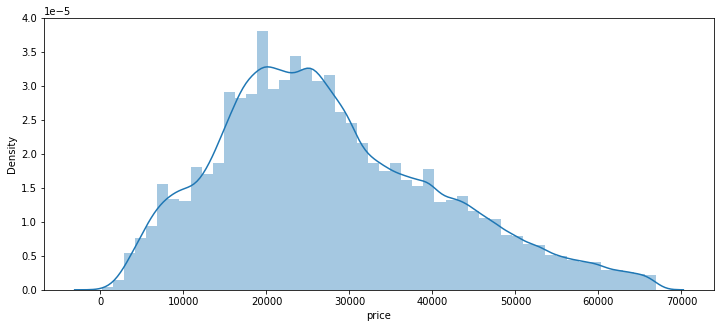

In [ ]:
main=df[df['price']<66960]
df1=main.reset_index(drop=True)
plt.figure(figsize=(12,5))
sns.distplot(df1['price'])
df1['price'].skew()

In [ ]:
df1.shape

(282679, 46)

23.833160405001944

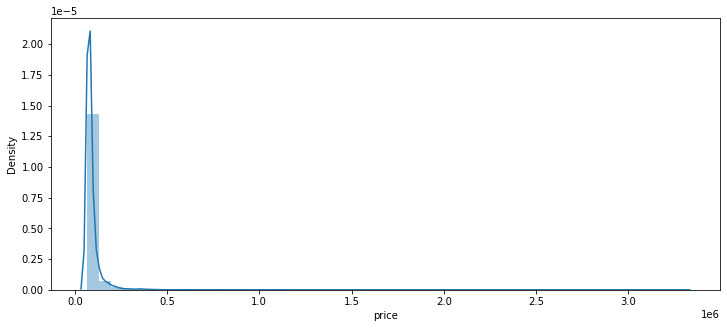

In [ ]:
outlier=df[df['price']>66960]
plt.figure(figsize=(12,5))
sns.distplot(outlier['price'])
outlier['price'].skew()

In [ ]:
outlier.shape

(8343, 46)

### UniVariate analysis 

In [ ]:
df_num=df.select_dtypes(include=np.number)
df_num.head()

back_legroom  daysonmarket  engine_displacement  front_legroom  \
0          40.2            41               6700.0           40.9   
1          38.2            22               5600.0           38.2   
2          36.2           198               2400.0           41.6   
3          40.3            24               6700.0           41.0   
4          40.9           105               6200.0           45.3   

   fuel_tank_volume  height  horsepower  length  maximum_seating   mileage  \
0              32.0    78.4       370.0   260.8              5.0      12.0   
1              17.5    66.1       305.0   189.9              5.0  165295.0   
2              13.2    61.0       158.0   173.0              5.0   86914.0   
3              31.0    79.8       350.0   237.3              6.0   92623.0   
4              26.0    74.0       420.0   230.0              6.0  145581.0   

     price  savings_amount  seller_rating  wheelbase  width  year  \
0  73681.0               0       4.454545      169.0   83.5     1   
1   6500.0            1753       4.680000      111.2   77.3    16   
2   7900.0             984       4.230769      102.4   69.5    12   
3  43866.0               1       5.000000      149.5   79.1     4   
4  23995.0            1401       4.200000      143.5   80.0     6   

   Rated_torque    Rated_hp  city_fuel_economy  highway_fuel_economy  
0    694.014286  275.133283               21.0                  29.0  
1    326.910204  259.786748               27.5                  37.0  
2    138.302667  123.381569               21.0                  29.0  
3    656.500000  175.932978               21.0                  29.0  
4    332.939286  298.990861               16.0                  23.0

In [ ]:
df_num.columns

Index(['back_legroom', 'daysonmarket', 'engine_displacement', 'front_legroom',
       'fuel_tank_volume', 'height', 'horsepower', 'length', 'maximum_seating',
       'mileage', 'price', 'savings_amount', 'seller_rating', 'wheelbase',
       'width', 'year', 'Rated_torque', 'Rated_hp', 'city_fuel_economy',
       'highway_fuel_economy'],
      dtype='object')

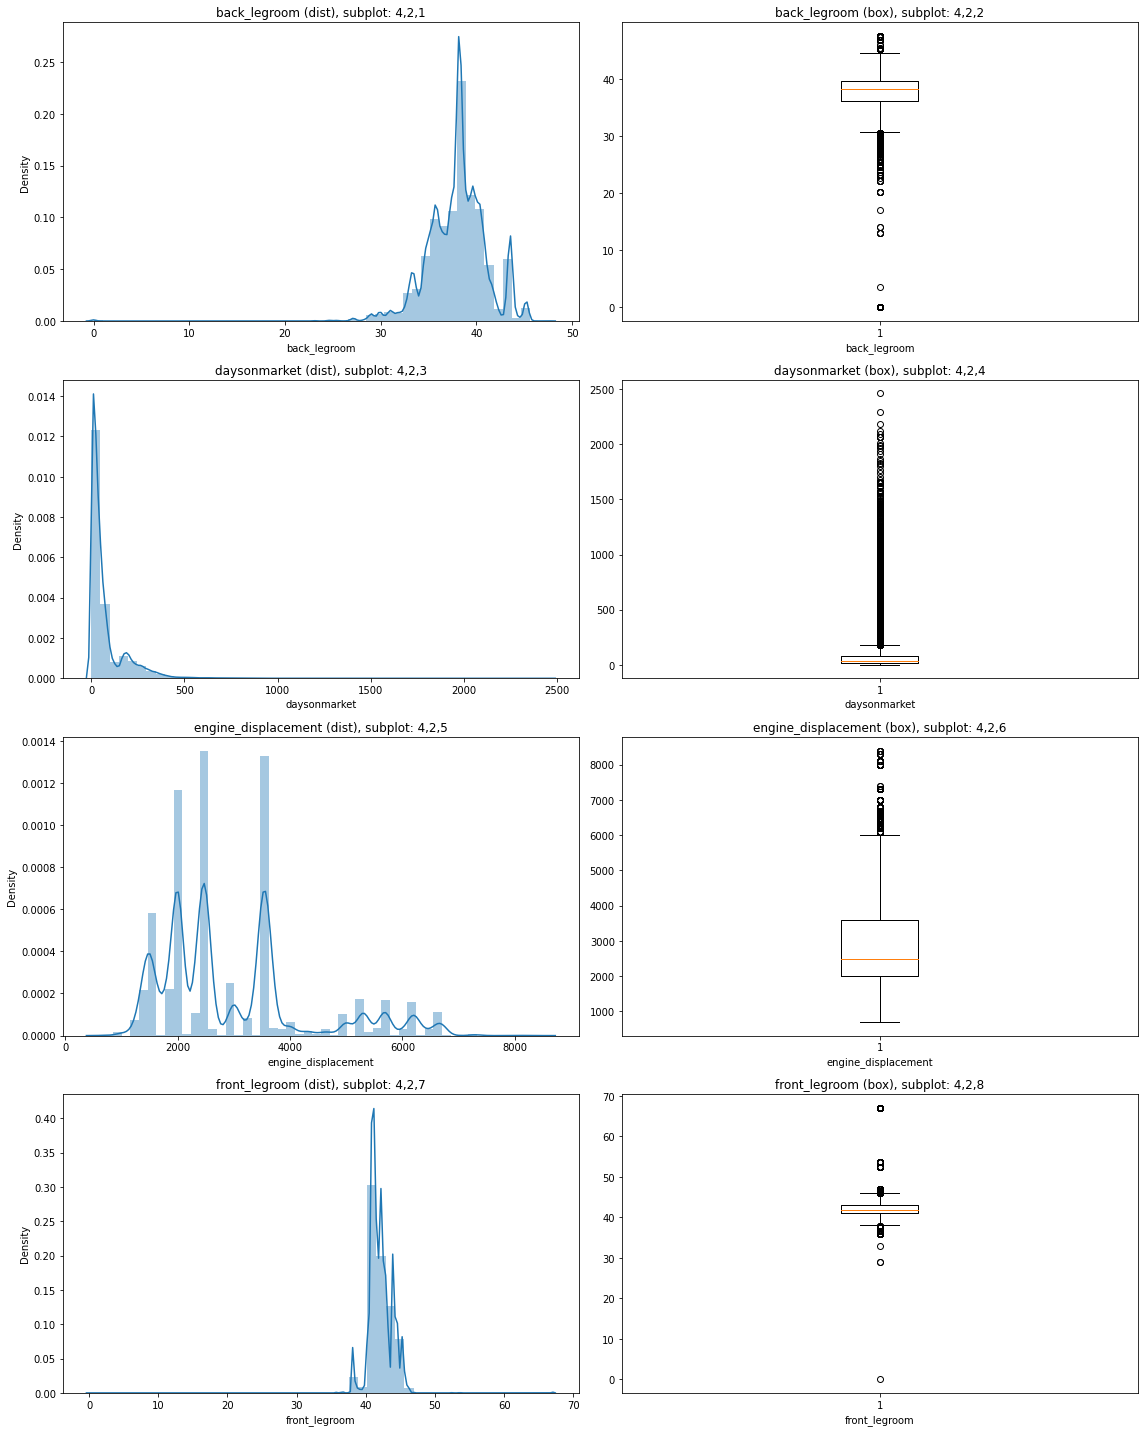

In [ ]:
cars = df_num[['back_legroom', 'daysonmarket', 'engine_displacement', 'front_legroom']]

#  plot Numerical Data
a = 4  # number of rows
b = 2  # number of columns
c=1
fig = plt.figure(figsize=(16,20))

for i in cars:
    plt.subplot(a, b,c)
    plt.title('{} (dist), subplot: {},{},{}'.format(i, a, b,c))
    plt.xlabel(i)
    sns.distplot(df_num[i])
    c=c+1

    plt.subplot(a, b,c)
    plt.title('{} (box), subplot: {},{},{}'.format(i, a, b,c))
    plt.xlabel(i)
    plt.boxplot(x = df_num[i])
    c=c+1

plt.tight_layout()
plt.show()

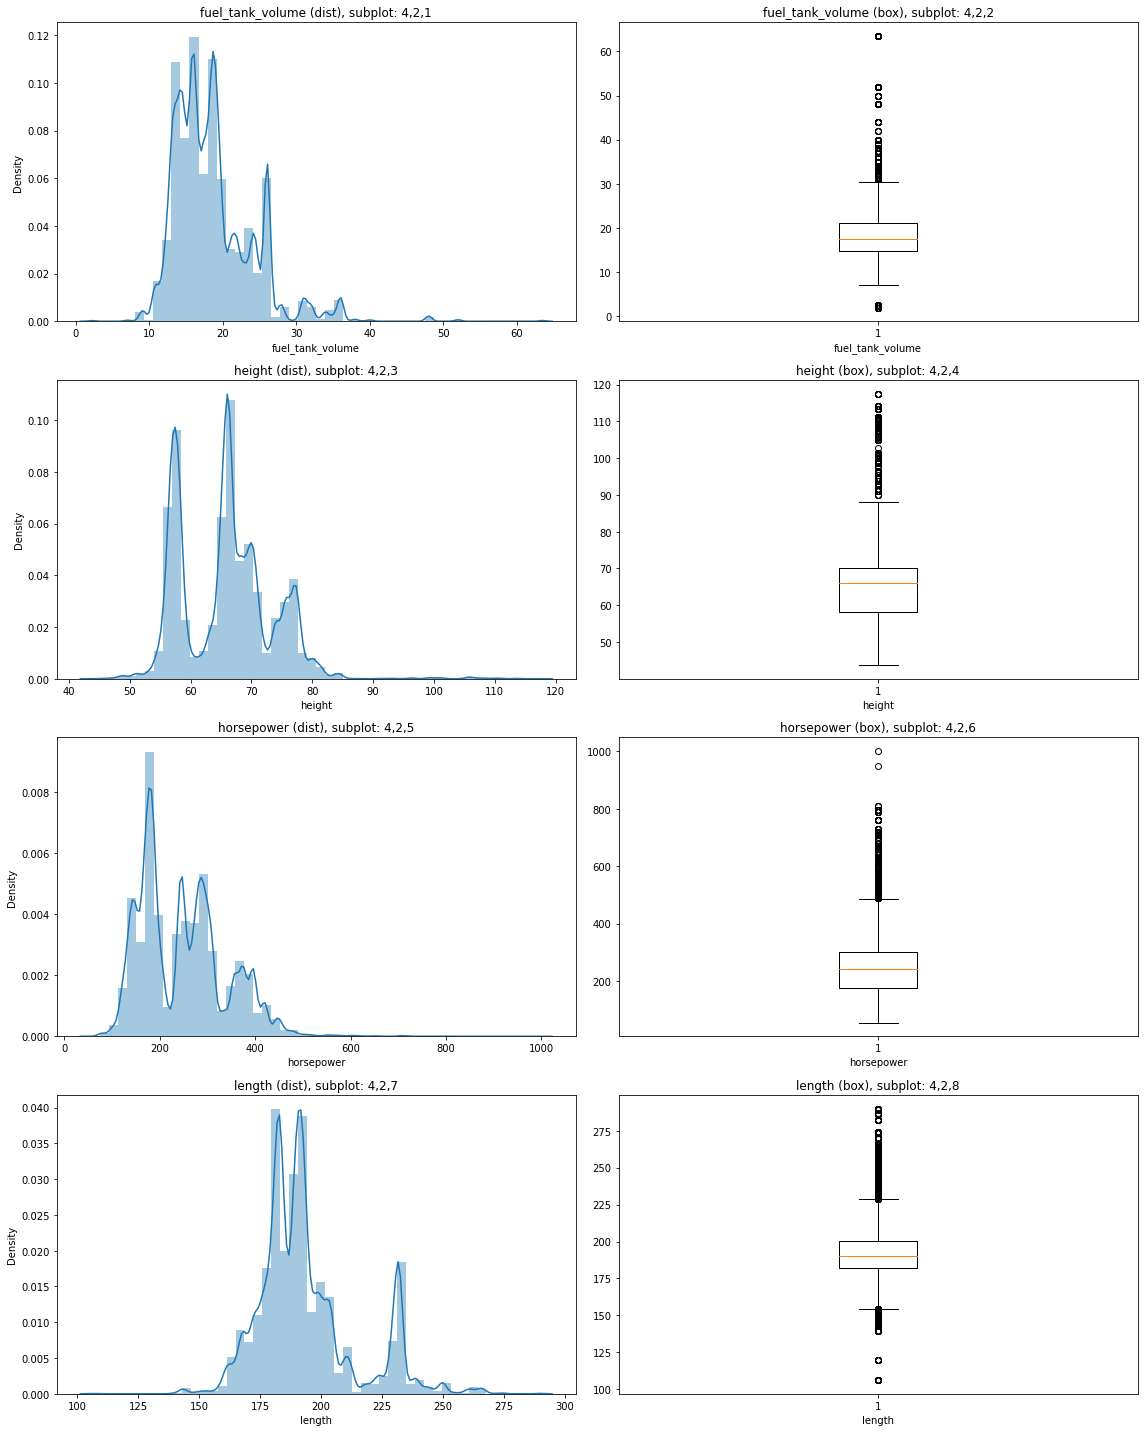

In [ ]:
cars2 = df_num[['fuel_tank_volume', 'height', 'horsepower', 'length']]

#  plot Numerical Data
a = 4  # number of rows
b = 2  # number of columns
c=1
fig = plt.figure(figsize=(16,20))

for i in cars2:
    plt.subplot(a, b,c)
    plt.title('{} (dist), subplot: {},{},{}'.format(i, a, b,c))
    plt.xlabel(i)
    sns.distplot(df_num[i])
    c=c+1

    plt.subplot(a, b,c)
    plt.title('{} (box), subplot: {},{},{}'.format(i, a, b,c))
    plt.xlabel(i)
    plt.boxplot(x = df_num[i])
    c=c+1

plt.tight_layout()
plt.show()

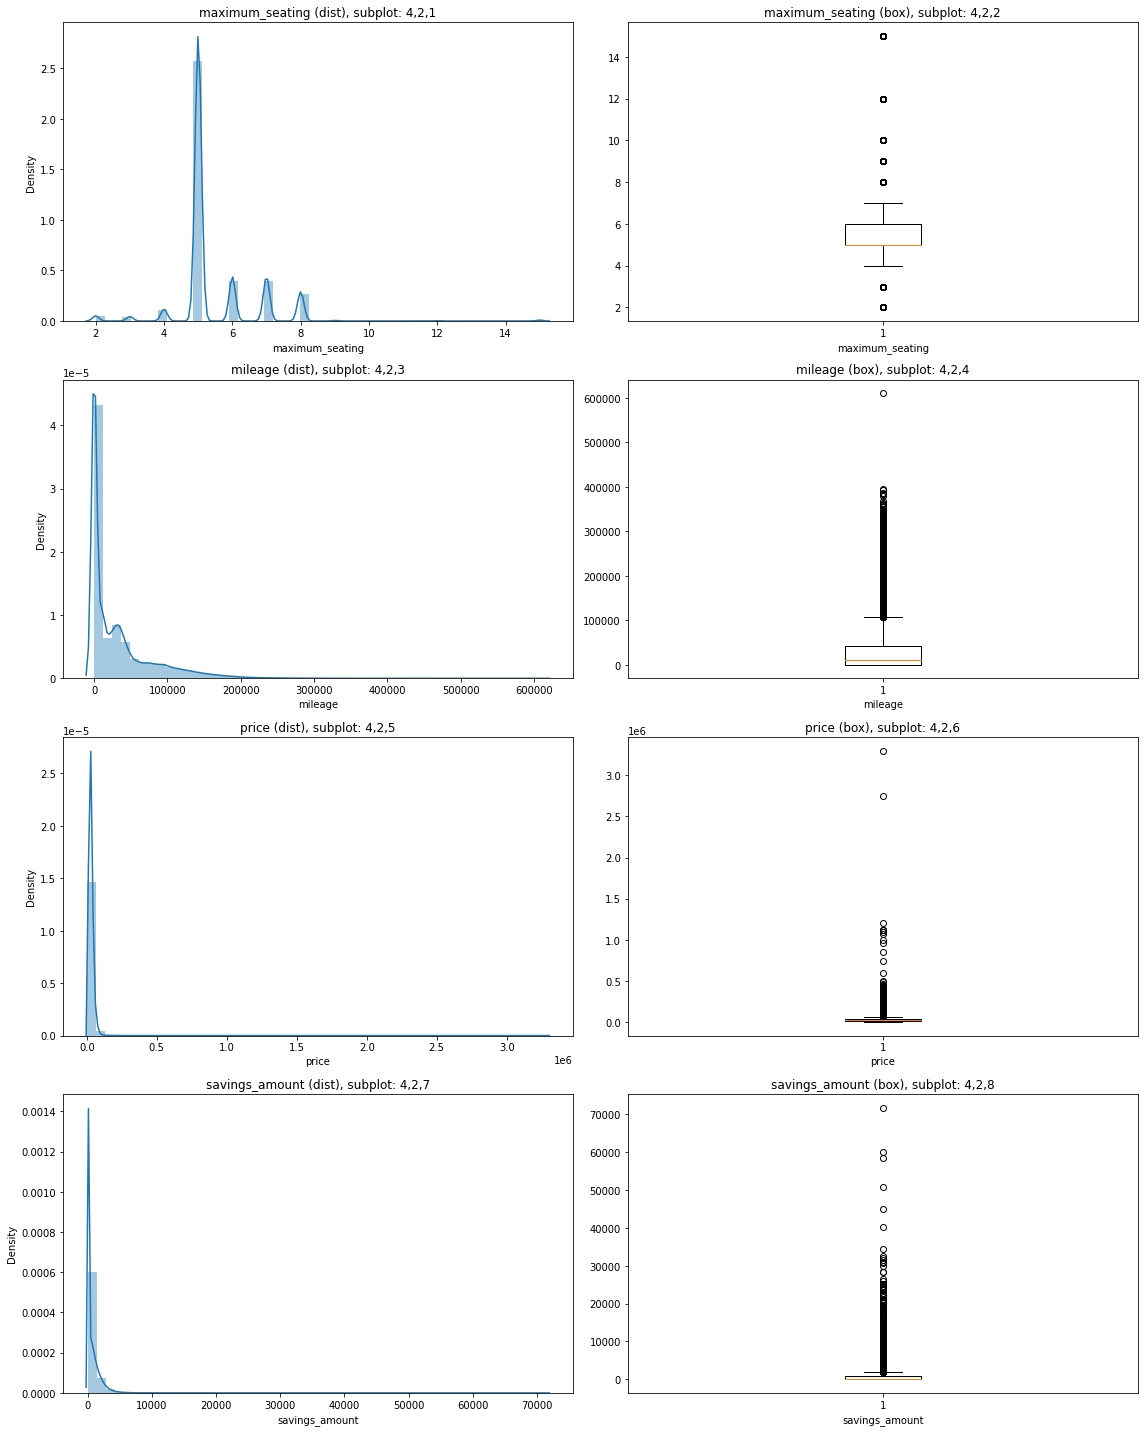

In [ ]:
cars3 = df_num[['maximum_seating','mileage', 'price', 'savings_amount']]

#  plot Numerical Data
a = 4  # number of rows
b = 2  # number of columns
c=1
fig = plt.figure(figsize=(16,20))

for i in cars3:
    plt.subplot(a, b,c)
    plt.title('{} (dist), subplot: {},{},{}'.format(i, a, b,c))
    plt.xlabel(i)
    sns.distplot(df_num[i])
    c=c+1

    plt.subplot(a, b,c)
    plt.title('{} (box), subplot: {},{},{}'.format(i, a, b,c))
    plt.xlabel(i)
    plt.boxplot(x = df_num[i])
    c=c+1

plt.tight_layout()
plt.show()

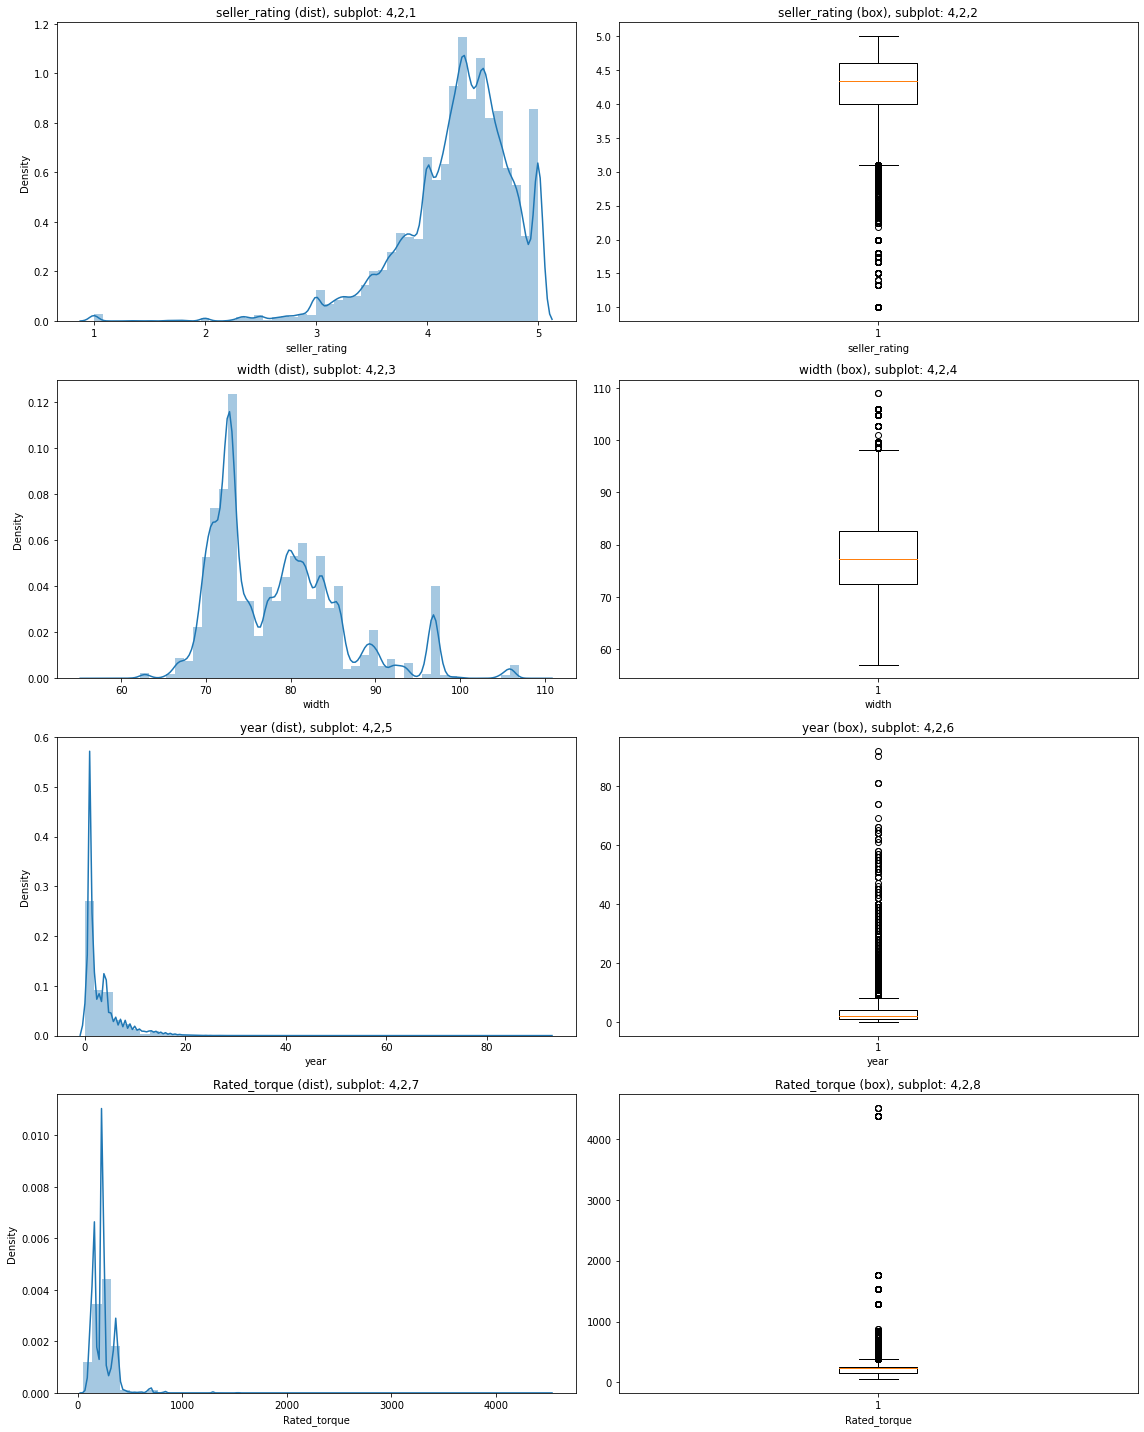

In [ ]:
cars4 = df_num[['seller_rating', 'width', 'year','Rated_torque']]

#  plot Numerical Data
a = 4  # number of rows
b = 2  # number of columns
c=1
fig = plt.figure(figsize=(16,20))

for i in cars4:
    plt.subplot(a, b,c)
    plt.title('{} (dist), subplot: {},{},{}'.format(i, a, b,c))
    plt.xlabel(i)
    sns.distplot(df_num[i])
    c=c+1

    plt.subplot(a, b,c)
    plt.title('{} (box), subplot: {},{},{}'.format(i, a, b,c))
    plt.xlabel(i)
    plt.boxplot(x = df_num[i])
    c=c+1

plt.tight_layout()
plt.show()

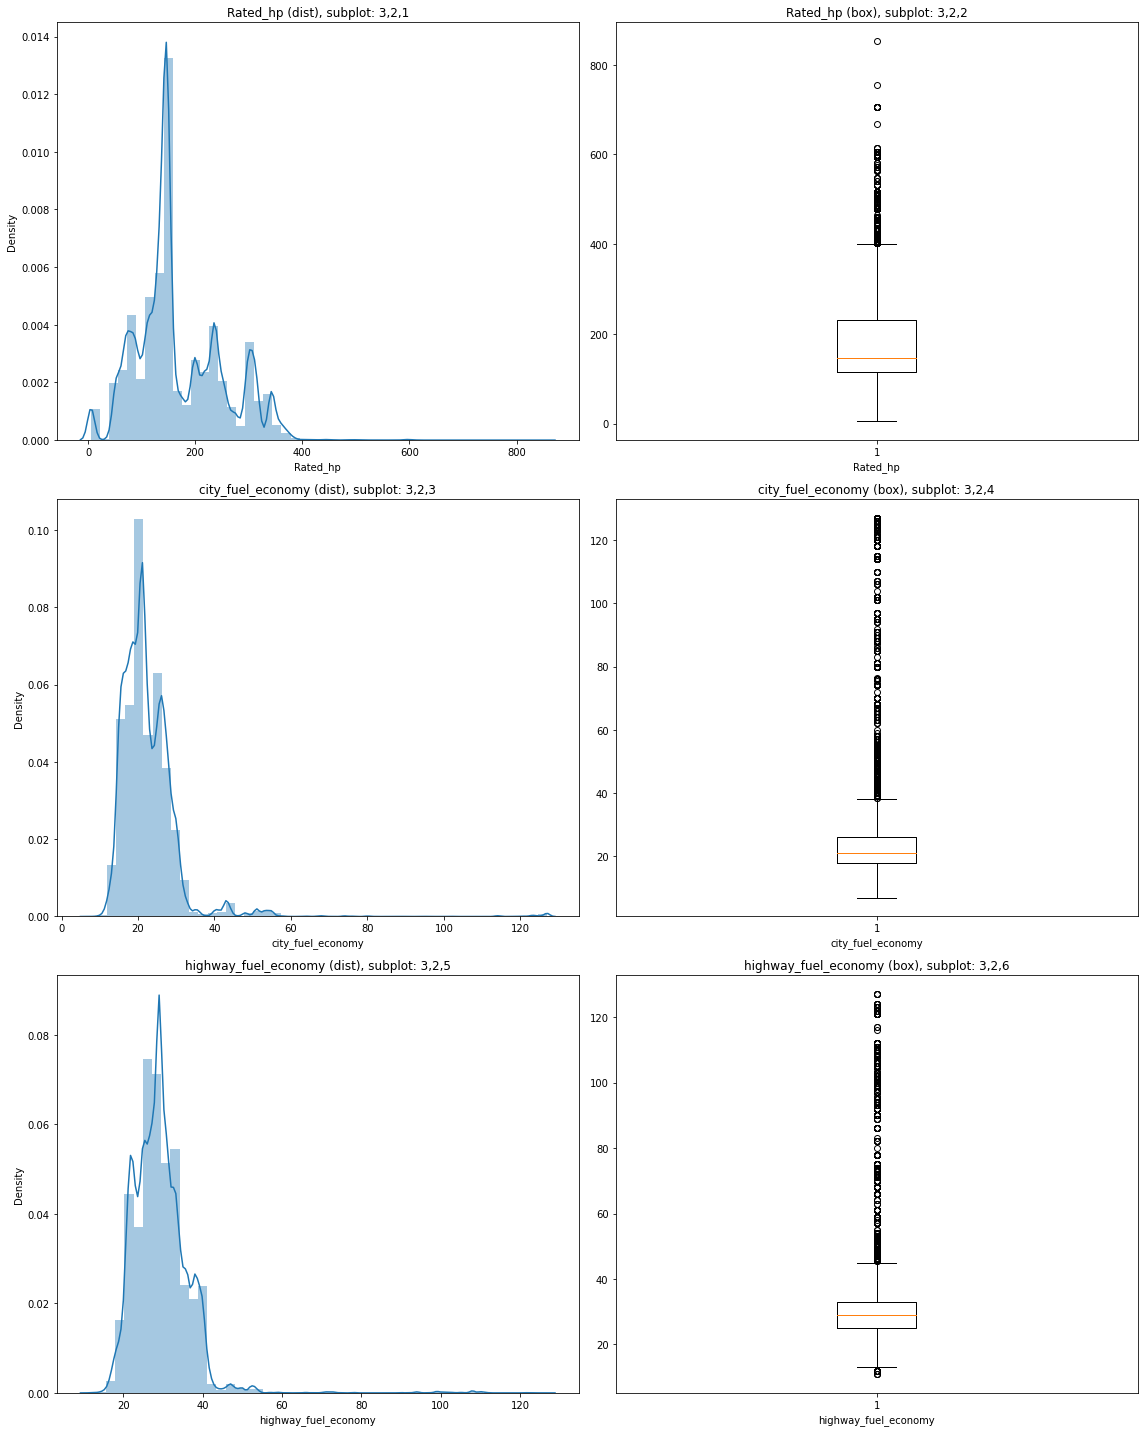

In [ ]:
cars4 = df_num[['Rated_hp', 'city_fuel_economy','highway_fuel_economy']]

#  plot Numerical Data
a = 3  # number of rows
b = 2  # number of columns
c=1
fig = plt.figure(figsize=(16,20))

for i in cars4:
    plt.subplot(a, b,c)
    plt.title('{} (dist), subplot: {},{},{}'.format(i, a, b,c))
    plt.xlabel(i)
    sns.distplot(df_num[i])
    c=c+1

    plt.subplot(a, b,c)
    plt.title('{} (box), subplot: {},{},{}'.format(i, a, b,c))
    plt.xlabel(i)
    plt.boxplot(x = df_num[i])
    c=c+1

plt.tight_layout()
plt.show()

In [ ]:
import plotly.figure_factory as ff

In [ ]:
corr = df.corr()

mask = np.triu(np.ones_like(corr, dtype=np.bool))
corr = corr.mask(mask)
fig = ff.create_annotated_heatmap(
    z=corr.to_numpy().round(2),
    x=list(corr.index.values),
    y=list(corr.columns.values),       
    xgap=3, ygap=3,
    zmin=-1, zmax=1,
colorscale='icefire',
    colorbar_thickness=30,
    colorbar_ticklen=3,
)
fig.update_layout(title_text='Correlation Matrix (impact relationship with numbers)',
                  title_x=0.5,
                  titlefont={'size': 20},
                  width=1200, height=1200,
                  xaxis_showgrid=False,
                  xaxis={'side': 'bottom'},
                  yaxis_showgrid=False,
                  yaxis_autorange='reversed',                   
                  paper_bgcolor=None,
                  template="simple_white"
                  )
fig.show()

In [ ]:
# BODY TYPE
#FUEL TYPE
#TRANSMISSION
#MAKE
#ENGINE TYPE
#HAS ACCIDENTS
#LISTING COLOR

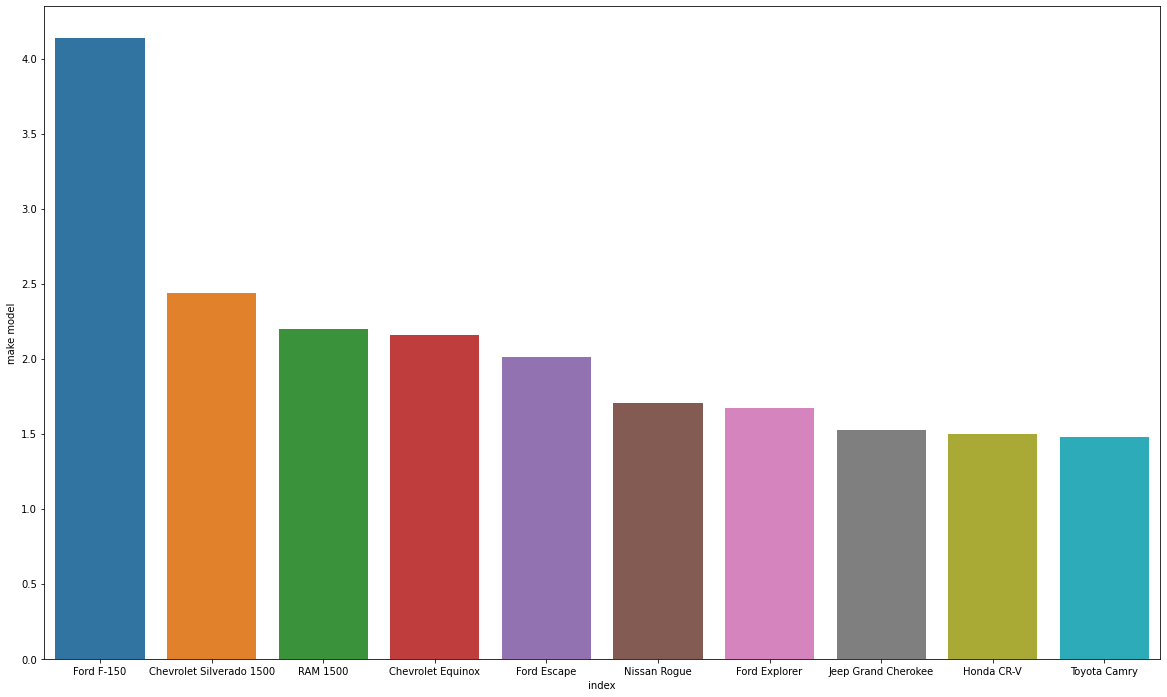

In [ ]:
df['make_name']=df['make_name'].astype('str')
df['model_name']=df['model_name'].astype('str')
df['make model']=df['make_name']+' '+df['model_name']
a=df['make model'].value_counts(normalize=True).head(10)*100
b=a.reset_index()
plt.figure(figsize=(20,12))
sns.barplot(x=b['index'],y=b['make model'])

In [ ]:
# make model dayon market plot

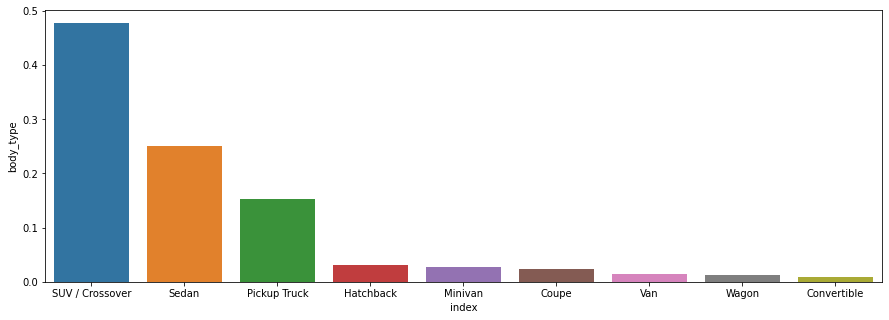

In [ ]:
c=df['body_type'].value_counts(normalize=True)
d=pd.DataFrame(c).reset_index()
plt.figure(figsize=(15,5))
sns.barplot(d['index'],d['body_type'])

In [ ]:
#Nearly 50% of the cars listed are SUV's.
#Sedans are second most listed after SUV's.

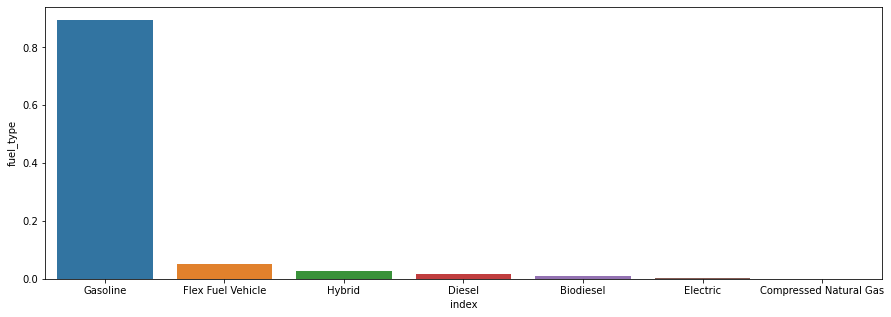

In [ ]:
c=df['fuel_type'].value_counts(normalize=True)
d=pd.DataFrame(c).reset_index()
plt.figure(figsize=(15,5))
sns.barplot(d['index'],d['fuel_type'])

In [ ]:
#We see that Gasoline cars are dominating in the cars which are listed on the website,as they are more conventional and economical 
#when compared to electric,biodiesel and hybrid cars

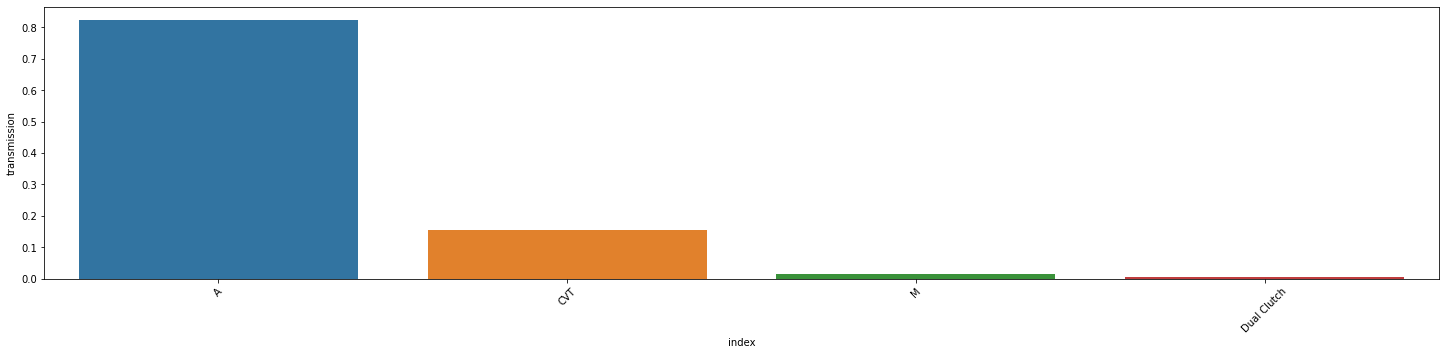

In [ ]:
c=df['transmission'].value_counts(normalize=True).head(10)
d=pd.DataFrame(c).reset_index()
plt.figure(figsize=(25,5))
plt.xticks(rotation=45)
sns.barplot(d['index'],d['transmission'])

In [ ]:
#We see that Automatic Cars are dominating in the used cars that are listed on the website.

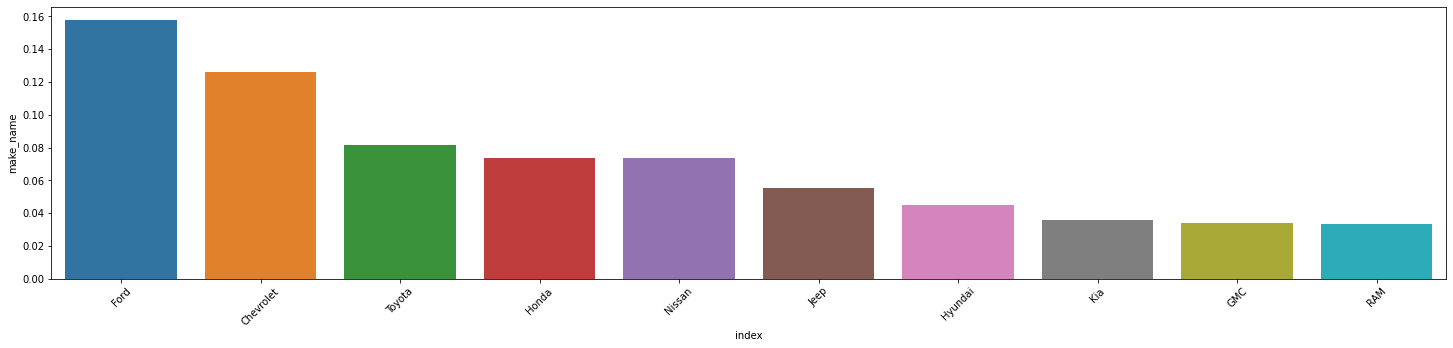

In [ ]:
c=df['make_name'].value_counts(normalize=True).head(10)
d=pd.DataFrame(c).reset_index()
plt.figure(figsize=(25,5))
plt.xticks(rotation=45)
sns.barplot(d['index'],d['make_name'])

In [ ]:
#The top three manufacturers of used cars which are listed are Ford,Chevrolet and Toyota

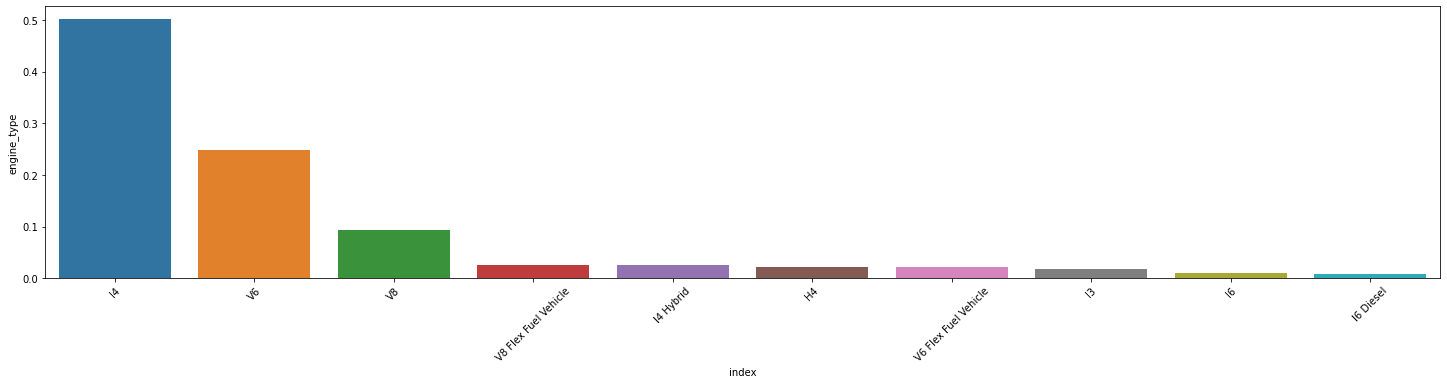

In [ ]:
c=df['engine_type'].value_counts(normalize=True).head(10)
d=pd.DataFrame(c).reset_index()
plt.figure(figsize=(25,5))
plt.xticks(rotation=45)
sns.barplot(d['index'],d['engine_type'])

In [ ]:
#Nearly 50% of the cars listed have an I4 engine.

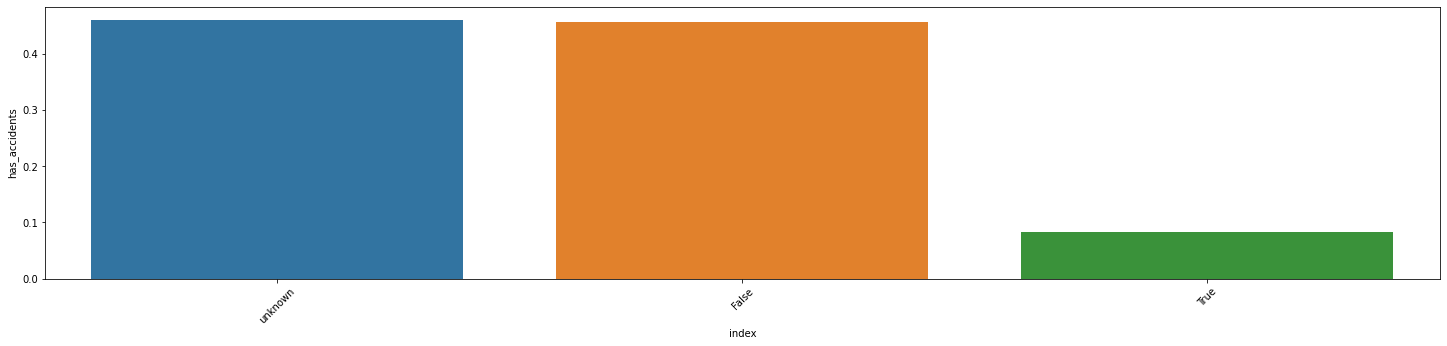

In [ ]:
c=df['has_accidents'].value_counts(normalize=True).head(10)
d=pd.DataFrame(c).reset_index()
plt.figure(figsize=(25,5))
plt.xticks(rotation=45)
sns.barplot(d['index'],d['has_accidents'])

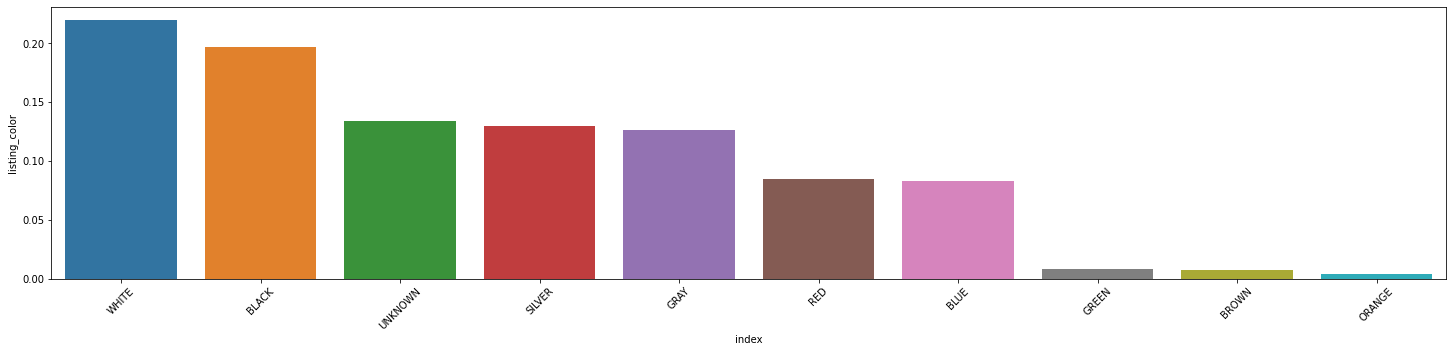

In [ ]:
c=df['listing_color'].value_counts(normalize=True).head(10)
d=pd.DataFrame(c).reset_index()
plt.figure(figsize=(25,5))
plt.xticks(rotation=45)
sns.barplot(d['index'],d['listing_color'])

In [ ]:
#We see that most of the cars listed are of white color,with the second highest being black color.

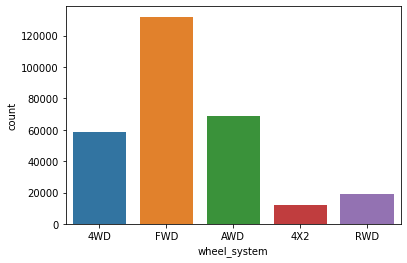

In [ ]:
sns.countplot(df['wheel_system'])

In [ ]:
#We see that front wheel drive cars are dominating in the used cars

### Bivariate analysis

In [ ]:
price_mean = df[['price','make_name']].groupby('make_name').mean().reset_index()

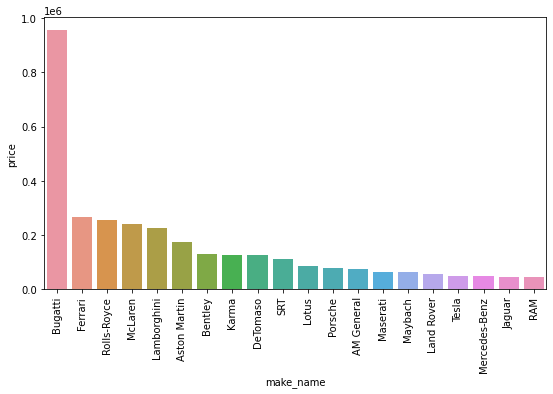

In [ ]:
price_mean1=price_mean.sort_values(by='price',ascending=False).head(20)
plt.figure(figsize=(9,5))
pr = sns.barplot(x='make_name', y="price", data=price_mean1)
var = pr.set_xticklabels(pr.get_xticklabels(), rotation=90)

In [ ]:
#We see that Bugatti has the highest average price when compared to other manufacturers listed on the website.
#Ferrari has the second highest average price following Bugatti

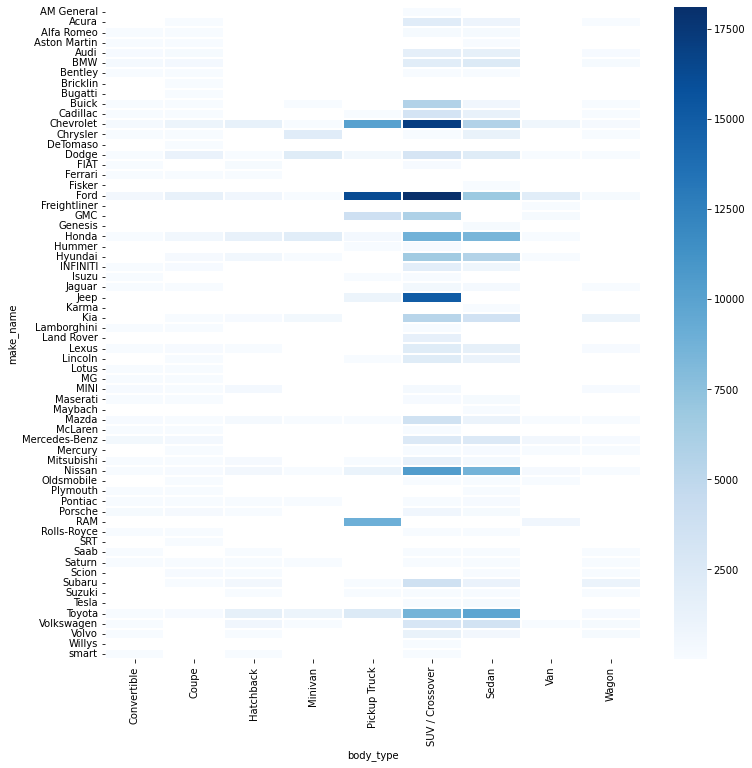

In [ ]:
type_ser = df.groupby('make_name').body_type.value_counts()
type_ser_df = pd.DataFrame(type_ser.unstack())

plt.subplots(figsize=(12, 12))
sns.heatmap(type_ser_df, cmap='Blues', linecolor='white', linewidth=1)

In [ ]:
#Chevrolet,Ford,Jeep are the manufacturers whose SUV's are the most listed on the website
#In Pickup trucks,cars manufactured by Ford are being listed the most

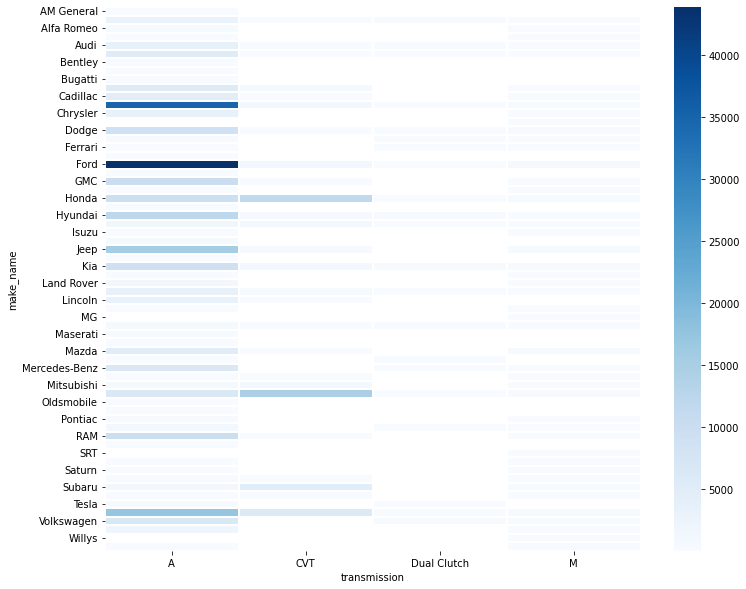

In [ ]:
# TRANSMISSION TYPE

trans_ser = df.groupby('make_name').transmission.value_counts()
trans_ser_df = pd.DataFrame(trans_ser.unstack())

plt.subplots(figsize=(12, 10))
sns.heatmap(trans_ser_df, cmap='Blues', linecolor='white', linewidth=1)

In [ ]:
#Ford cars with Automatic transmission are the most listed on the website

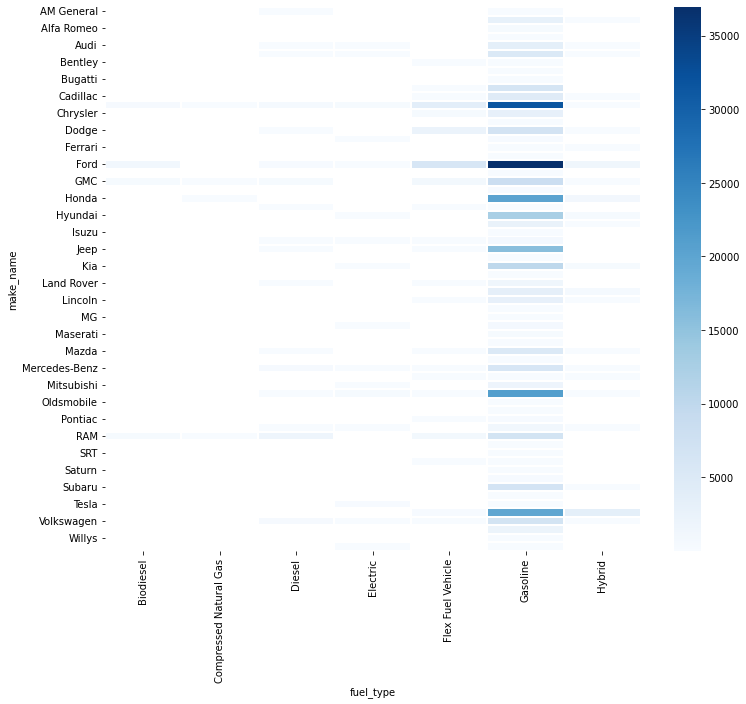

In [ ]:
fuel_ser = df.groupby('make_name').fuel_type.value_counts()
fuel_ser_df = pd.DataFrame(fuel_ser.unstack())

plt.subplots(figsize=(12, 10))
sns.heatmap(fuel_ser_df, cmap='Blues', linecolor='white', linewidth=1)

In [ ]:
#Gasoline is the most dominating fuel type for the cars listed,with most of them manufactured by Ford.

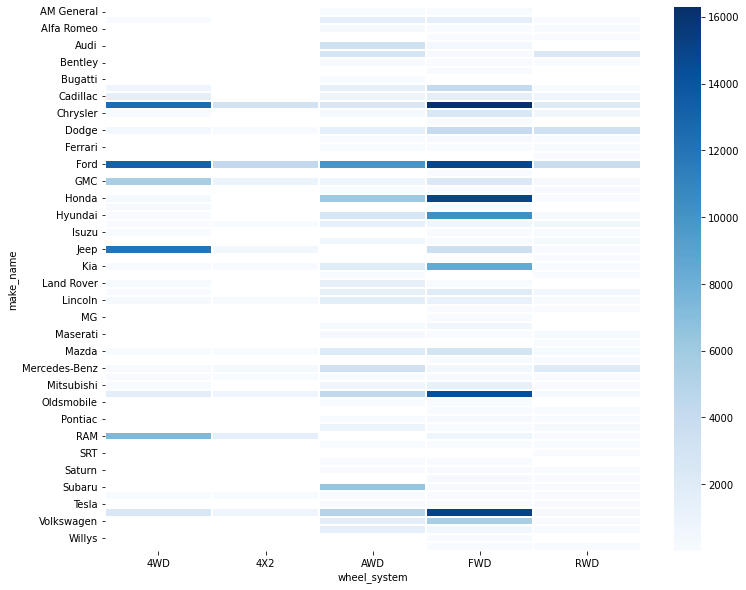

In [ ]:
drive_ser = df.groupby('make_name').wheel_system.value_counts()
drive_ser_df = pd.DataFrame(drive_ser.unstack())

plt.subplots(figsize=(12, 10))
sns.heatmap(drive_ser_df, cmap='Blues', linecolor='white', linewidth=1)

In [ ]:
#FWD is the dominating

In [ ]:
a=df[(df['make_name']=='Ford') | (df['make_name']=='Chevrolet') |(df['make_name']=='Toyota') |(df['make_name']=='Honda') | (df['make_name']=='Nissan')]

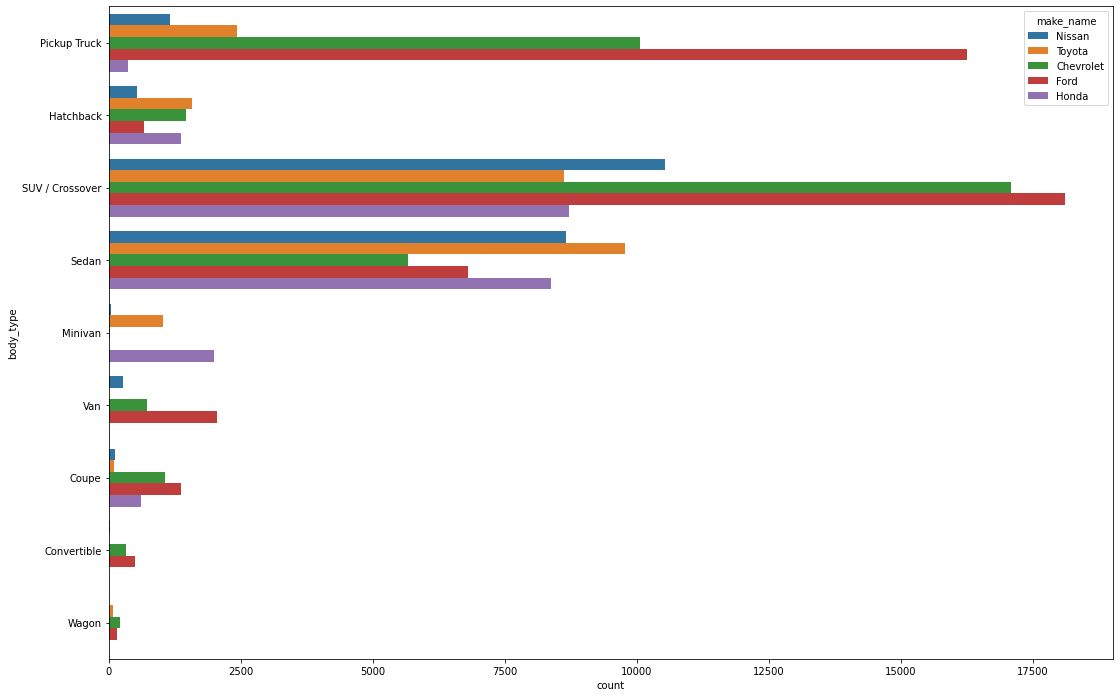

In [ ]:
plt.subplots(figsize=(18, 12))

sns.countplot(y="body_type", hue="make_name", data=a)

In [ ]:
#Ford is most dominating manufacturer across all body types which are listed on the website

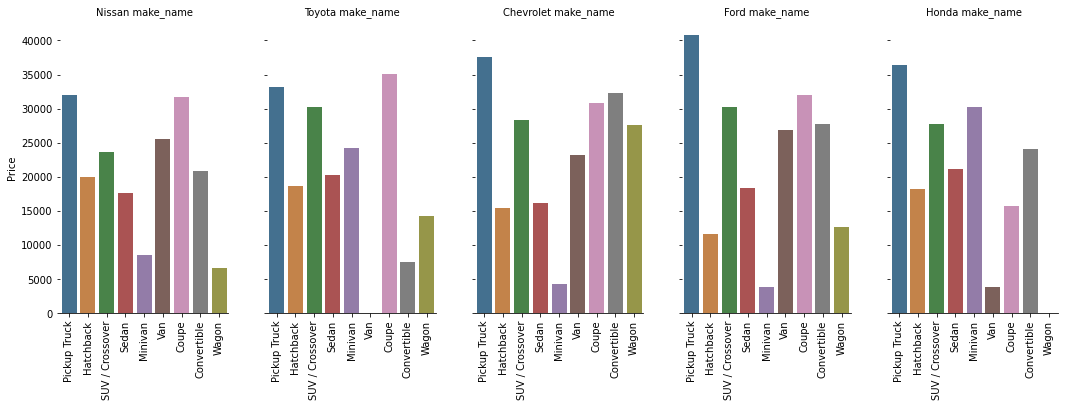

In [ ]:
g = sns.catplot(x="body_type", y="price", col="make_name",
                data=a, saturation=.5,
                kind="bar", ci=None, aspect=.6)
(g.set_axis_labels("", "Price")
  .set_xticklabels(['Pickup Truck', 'Hatchback', 'SUV / Crossover', 'Sedan', 'Minivan',
       'Van', 'Coupe', 'Convertible', 'Wagon'])
  .set_titles("{col_name} {col_var}")
  .set_xticklabels(rotation=90)
  .despine(left=True))

In [ ]:
price = df.groupby('make_name')['price'].max().reset_index()
price  = price.sort_values("price")
price = price.tail(10)
fig = px.pie(price,
             values="price",
             names="make_name",
             template="seaborn")
fig.update_traces(rotation=90, pull=0.05, textinfo="percent+label")
fig.show()

In [ ]:
h=df.groupby(['make_name'])['price'].mean().reset_index()
f=h.sort_values(by='price',ascending=False).head(10)
f

make_name          price
8        Bugatti  955000.000000
16       Ferrari  266622.793478
51   Rolls-Royce  256255.648649
41       McLaren  239798.896552
31   Lamborghini  225402.736842
3   Aston Martin  173967.377358
6        Bentley  130993.345679
29         Karma  127696.666667
13      DeTomaso  125000.000000
52           SRT  110995.000000

In [ ]:
f=h.sort_values(by='price',ascending=False).tail(10)
f

make_name         price
15        FIAT  14909.508418
55       Scion   9179.534413
63       smart   8068.425926
53        Saab   7312.382353
48     Pontiac   6789.103586
57      Suzuki   5829.187500
43     Mercury   5333.047904
54      Saturn   4943.605839
26       Isuzu   4726.700000
46  Oldsmobile   3940.214286

### Outlier Treatment

In [ ]:
df1.shape

(282679, 46)

In [ ]:
dfnum1=df1.select_dtypes(include=np.number)
dfnum1.shape

(282679, 20)

In [ ]:
dfnum1.skew()

back_legroom           -1.523535
daysonmarket            3.788580
engine_displacement     1.173055
front_legroom           1.411285
fuel_tank_volume        1.604048
height                  0.715508
horsepower              0.590662
length                  1.025027
maximum_seating         1.846953
mileage                 1.903797
price                   0.568104
savings_amount          2.888586
seller_rating          -1.482920
wheelbase               1.648792
width                   0.990916
year                    2.886025
Rated_torque            3.362094
Rated_hp                0.585690
city_fuel_economy       6.086126
highway_fuel_economy    3.719403
dtype: float64

In [ ]:
dfcat1=df1.select_dtypes(exclude=np.number)
dfcat1.shape

(282679, 26)

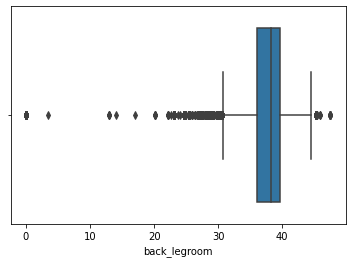

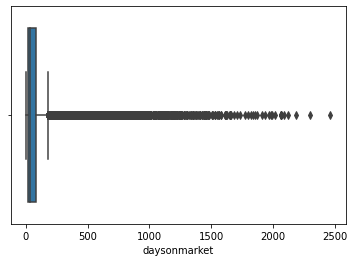

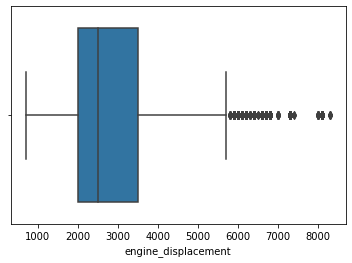

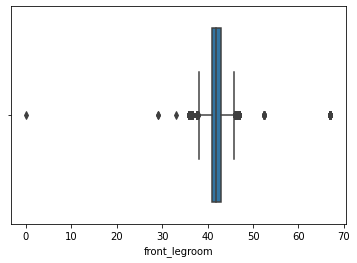

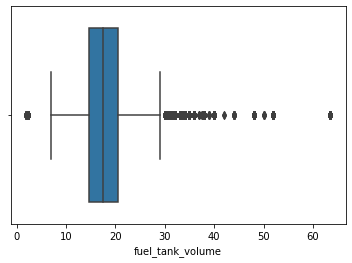

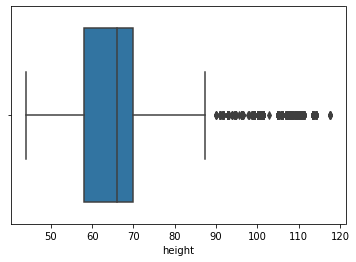

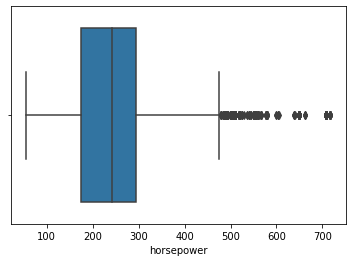

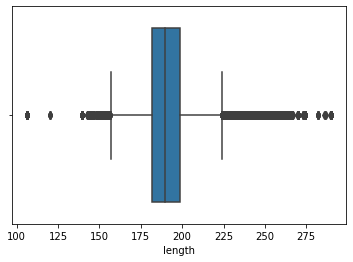

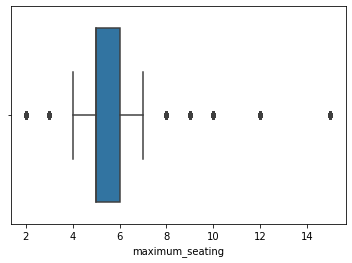

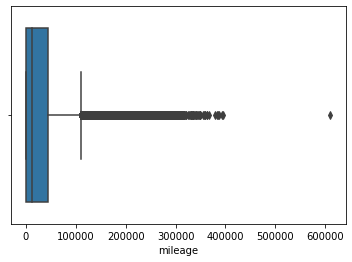

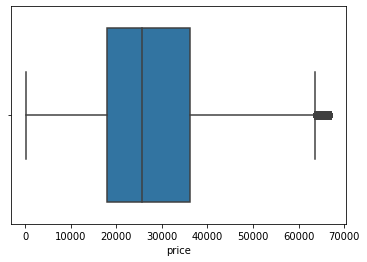

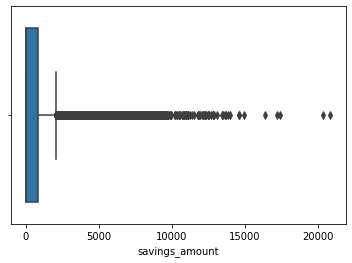

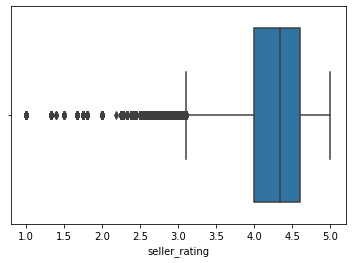

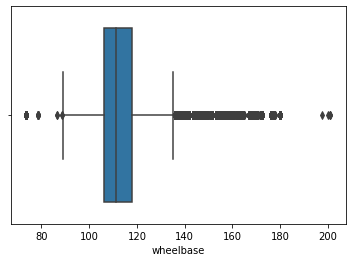

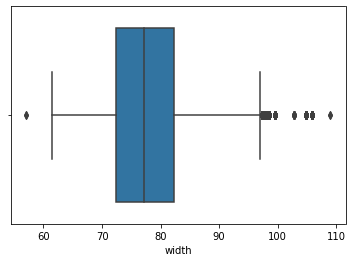

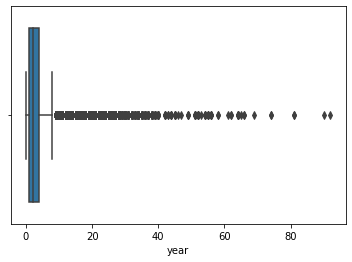

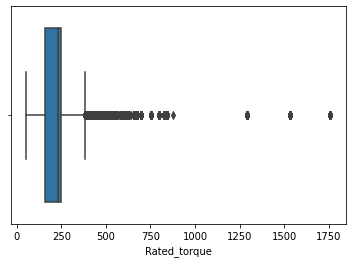

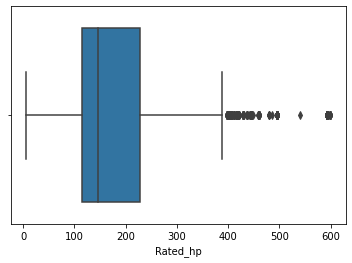

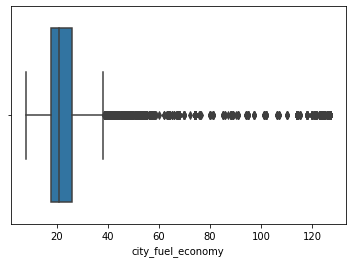

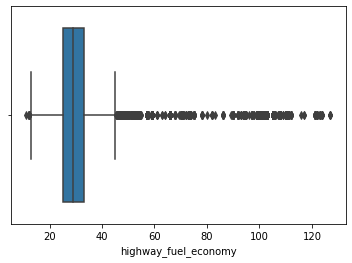

In [ ]:
for i in dfnum1:
    sns.boxplot(dfnum1[i])
    plt.show()

### outlier removal

In [ ]:
df1.shape

(282679, 46)

In [ ]:
# Removing extreme outliers from back legroom
df1=df1[df1['back_legroom']>20]


In [ ]:
# Removing extreme outliers from
df2=df1[df1['daysonmarket']<2200]
df2.shape

(282477, 46)

In [ ]:
# Removing ouliers from rated hp
df3=df2[df2['Rated_hp']<500]
df3.shape

(282428, 46)

In [ ]:

# Removing outliers from rated torque
df4=df3[df3['Rated_torque']<1000]

In [ ]:
# Removing outliers from year
df5=df4[df4['year']<70]

In [ ]:

# Removing outliers from wheelbase
df6=df5[df5['wheelbase']<190]
df6.shape

(282041, 46)

In [ ]:
# Removing outliers from seller rating
df7=df6[df6['seller_rating']>2.2]
df7.shape

(280884, 46)

In [ ]:
# Removing outliers from savings amount
df8=df7[df7['savings_amount']<15000]
df8.shape

(280879, 46)

In [ ]:
# Removing outliers from mileage
df9=df8[df8['mileage']<500000]

In [ ]:

# Removing outliers from length
df10=df9[df9['length']>130]

In [ ]:

# Removing outliers from horsepower
df11=df10[df10['horsepower']<600]

In [ ]:
# Removing outliers from fuel tank volume
df12=df11[df11['fuel_tank_volume']<43]

In [ ]:

# Removing outliers from front legroom
df13=df12[df12['front_legroom']<50]

In [ ]:


# Removing outliers from engine displacement
df14=df13[df13['engine_displacement']<7100]

In [ ]:
dffinal=df14.reset_index(drop=True)
dffinal.shape

(279630, 46)

### after oulier treatment

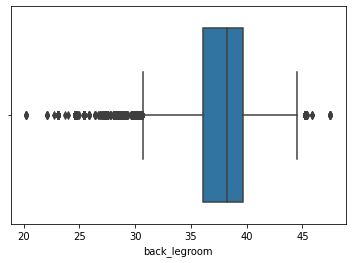

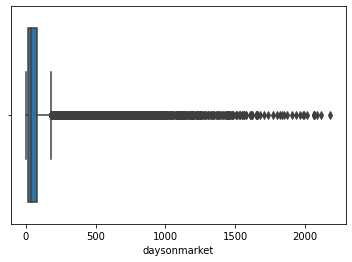

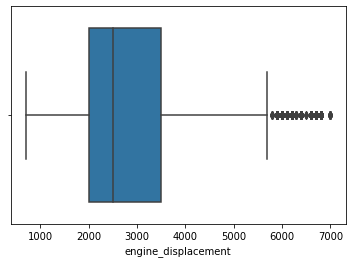

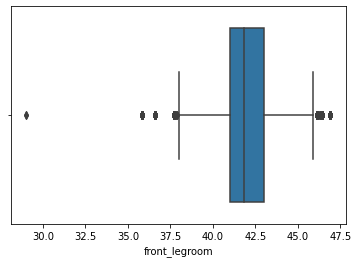

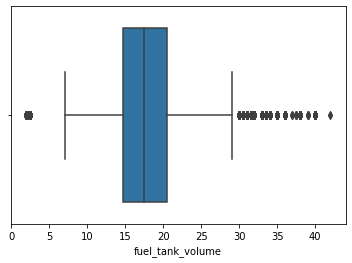

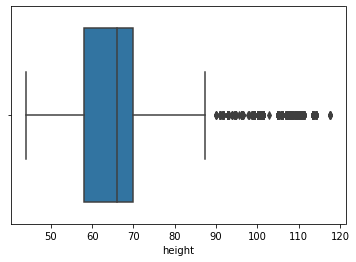

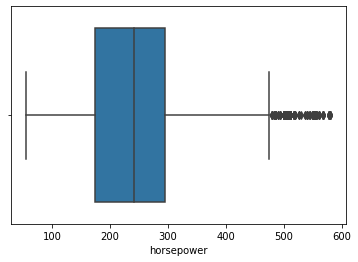

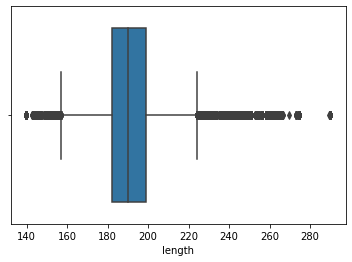

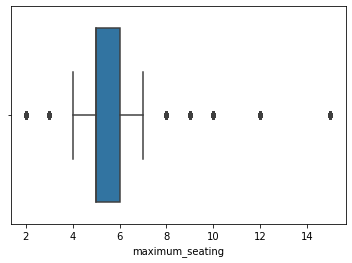

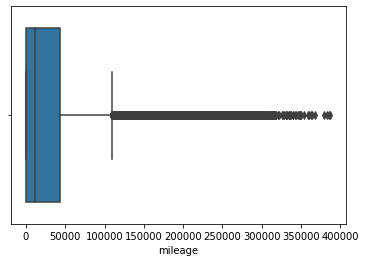

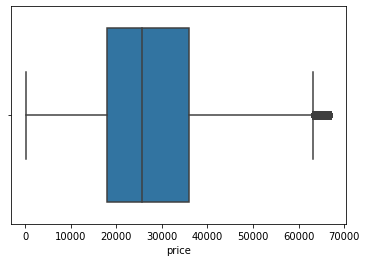

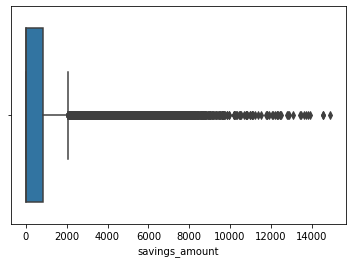

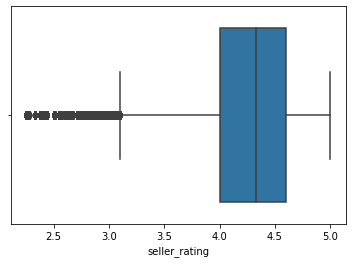

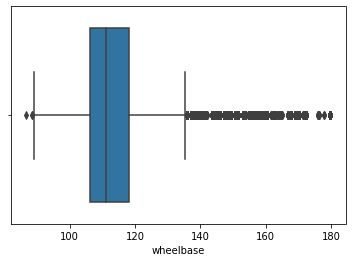

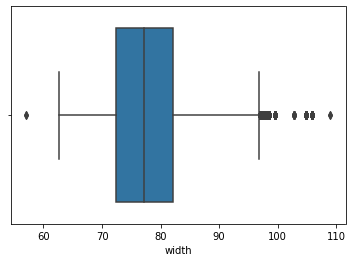

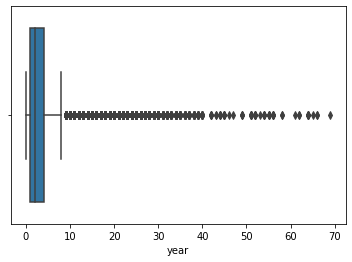

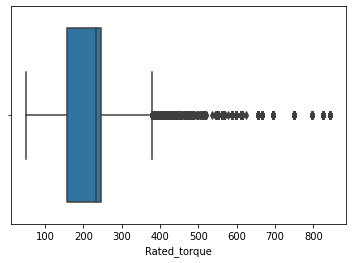

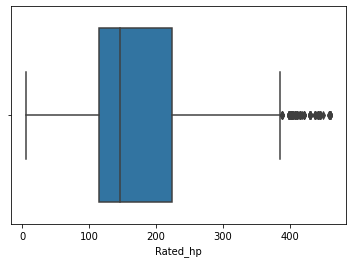

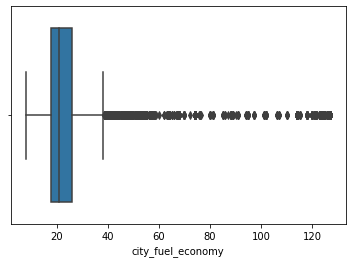

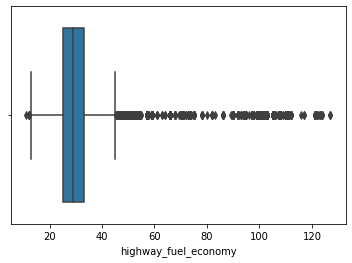

In [ ]:
for i in dffinal.select_dtypes(include=np.number):
    sns.boxplot(dffinal[i])
    plt.show()

In [ ]:
dffinal.head()

vin  back_legroom     body_type         city  daysonmarket  \
0  1N6BA07B35N526305          38.2  Pickup Truck  Bloomington            22   
1  2T1KE40E69C008720          36.2     Hatchback    San Mateo           198   
2  3C63R3EL6HG669864          40.3  Pickup Truck     Edgewood            24   
3  3GCUKSEC0FG192969          40.9  Pickup Truck       Angola           105   
4  1G2JB1245X7510273          32.6         Coupe     Thompson             6   

   engine_displacement engine_type                      exterior_color  fleet  \
0               5600.0          I4                      Radiant Silver  False   
1               2400.0          I4                   Sundance Metallic  False   
2               6700.0   I6 Diesel  Granite Crystal Metallic Clearcoat  False   
3               6200.0          V8                                 Red  False   
4               2200.0          I4                                 Red   True   

  frame_damaged  ...             trim_name wheel_system  wheelbase  width  \
0         False  ...       SE Crew Cab 4WD          4WD      111.2   77.3   
1         False  ...                     S          FWD      102.4   69.5   
2         False  ...  Laramie Crew Cab 4WD          4WD      149.5   79.1   
3         False  ...      LTZ Crew Cab 4WD          4WD      143.5   80.0   
4         False  ...         2 Dr SE Coupe          FWD      104.1   68.4   

  year Rated_torque    Rated_hp  city_fuel_economy highway_fuel_economy Is_new  
0   16   326.910204  259.786748               27.5                 37.0  False  
1   12   138.302667  123.381569               21.0                 29.0  False  
2    4   656.500000  175.932978               21.0                 29.0  False  
3    6   332.939286  298.990861               16.0                 23.0  False  
4   22   120.796000   92.536177               21.0                 29.0  False  

[5 rows x 46 columns]

### Dealing with Major options

In [ ]:
dffinal.shape

(279630, 46)

In [ ]:
list1=list(dffinal['major_options'])

In [ ]:
def uniqueitems1(x):
    items=[]
    for i in x:
        if(i!='unknown'):
            a=i.replace('[','').replace(']','')
            b=a.replace("'",'')
            c=b.split(',')
            for j in c:
                if j not in items:
                    items.append(j)
        else:
            continue
    return items
result=uniqueitems1(list1)

In [ ]:
result1=[]
for i in result:
    if(' ' in i):
        b=i.replace(' ','')
        result1.append(b)
    else:
        result1.append(i)

In [ ]:
result2=[]
for i in result1:
    a=i.lower()
    if a not in result2:
        result2.append(a)

In [ ]:
b1f=[]

b1=[' 101A Mid Equipment Group',
 '301A Mid Equipment Group',
 '302A Luxury Equipment Group',
 '501A Mid Equipment Group',
 '502A Luxury Equipment Group',
 '601A Luxury Equipment Group',
 '701A Luxury Equipment Group',
 '802A Luxury Equipment Group']

for i in b1:
    if(' ' in i):
        b=i.replace(' ','')
        a=b.lower()
        b1f.append(a)
print(b1f)


['101amidequipmentgroup', '301amidequipmentgroup', '302aluxuryequipmentgroup', '501amidequipmentgroup', '502aluxuryequipmentgroup', '601aluxuryequipmentgroup', '701aluxuryequipmentgroup', '802aluxuryequipmentgroup']


In [ ]:
b2f=[]

b2=[ 'Acoustical Package',
 'Bluetooth',
 'Bose High End Sound Package',
 'DVD Entertainment System',
 'Premium Audio Package',
 'Sound Package',
'Acoustical Package',
'Android Auto',
'Audio Package',
'CarPlay',
'Memory Package',
'Multimedia Package','premiumsound package']

for i in b2:
    if(' ' in i):
        b=i.replace(' ','')
        a=b.lower()
        b2f.append(a)
print(b2f)

['acousticalpackage', 'bosehighendsoundpackage', 'dvdentertainmentsystem', 'premiumaudiopackage', 'soundpackage', 'acousticalpackage', 'androidauto', 'audiopackage', 'memorypackage', 'multimediapackage', 'premiumsoundpackage']


In [ ]:
b3f=[]

b3=[' Adaptive Cruise Control',
 ' All-Wheel Steering',
 'navigation system',
'remote start']

for i in b3:
    if(' ' in i):
        b=i.replace(' ','')
        a=b.lower()
        b3f.append(a)
print(b3f)



['adaptivecruisecontrol', 'all-wheelsteering', 'navigationsystem', 'remotestart']


In [ ]:
b4f=[]

b4=[' 5th Wheel',
 ' Alloy Wheels',
 ' Chrome Wheels',
 ' Dual Rear Wheels',
 ' Premium Wheels',
 ' Steel Wheels']

for i in b4:
    if(' ' in i):
        b=i.replace(' ','')
        a=b.lower()
        b4f.append(a)
print(b4f)

['5thwheel', 'alloywheels', 'chromewheels', 'dualrearwheels', 'premiumwheels', 'steelwheels']


In [ ]:
b5f=[]

b5=[' Ambient Light Package',
 ' Bi Xenon Headlamp Package',
 ' Convenience Light Package',
 ' Courtesy Lights Illum Package',
 ' Light Package']

for i in b5:
    if(' ' in i):
        b=i.replace(' ','')
        a=b.lower()
        b5f.append(a)
print(b5f)

['ambientlightpackage', 'bixenonheadlamppackage', 'conveniencelightpackage', 'courtesylightsillumpackage', 'lightpackage']


In [ ]:
b6f=[]

b6=['2lt Package',
 'AMG Sport Package',
 'Cold Weather Package',
 'Comfort Package',
 'Convenience Package',
 'Convenience Plus Package',
 'conveniencepluspackage',
 'Customer Preferred Package',
 'Driver Assistance Package',
 'Driver Confidence Package',
 'Elite Package',
 'Executive Package',
 'Extra Value Package'
 'F01 Package',
 'Grand Tour Package',
 'Heat Package',
 'Journey Package',
 'King Ranch Package',
 'Lariat Package',
 'LE Package'
 'Levant Package',
 'Limited Package',
 'LS Package',
 'LT Package',
 'Luxury Package',
 'M Sport Package',
 'Off Road Package',
 'P01 Premium Package',
 'P1 Package',
 'P2 Package',
 'Performance Handling Package',
 'Performance Package',
 'Power Package',
 'Preferred Package',
 'Premium 1 Package',
 'Premium 2 Package',
 'Premium Package',
 'Premium Plus Package',
 'Quick Order Package',
 'Quiet Package',
 'Rear Climate Package',
 'RS Package',
 'S Line Package',
 'S Line Sport Package',
 'Safety Package',
 'SE Package',
 'Security Package',
 'Skid Plate Package',
 'SL Package',
 'SLE Package',
 'SLT Package',
 'Special Edition Package',
 'Sport Activity Package',
 'Sport Chrono Package',
 'Sport Package',
 'SR5 Grade Package',
 'SR5 Package',
 'Storage Package',
 'SXT Package',
 'Technology Package',
 'TRD Package',
 'Trim Package',
 'Ultimate Package',
 'Ultra Luxury Package',
 'Upgrade Package',
 'Utility Package',
 'Value Package',
 'Winter Package',
 'XLE Package',
 'XLT Package',
 'Z71 Package',
 'Appearance and Protection Package',
 'Appearance Package',
 'Cargo Package',
 'Graphics Package',
 'Ground Effects Package',
 'Heavy Duty Trailer Package',
 'License Plate Front Mount Package',
 'Popular Equipment Package',
 'Power Mirror Package',
 'Preferred Accessory Package',
 'Preferred Equipment Package',
 'Remote Vehicle Starter Prep Package',
 'Smoker Package',
 'Tour Package',
 'Tow Package',
 'Trailer Package',
 'Wood Trim Package',
 'Wood Upgrade Package']

for i in b6:
    if(' ' in i):
        b=i.replace(' ','')
        a=b.lower()
        b6f.append(a)
print(b6f)

['2ltpackage', 'amgsportpackage', 'coldweatherpackage', 'comfortpackage', 'conveniencepackage', 'conveniencepluspackage', 'customerpreferredpackage', 'driverassistancepackage', 'driverconfidencepackage', 'elitepackage', 'executivepackage', 'extravaluepackagef01package', 'grandtourpackage', 'heatpackage', 'journeypackage', 'kingranchpackage', 'lariatpackage', 'lepackagelevantpackage', 'limitedpackage', 'lspackage', 'ltpackage', 'luxurypackage', 'msportpackage', 'offroadpackage', 'p01premiumpackage', 'p1package', 'p2package', 'performancehandlingpackage', 'performancepackage', 'powerpackage', 'preferredpackage', 'premium1package', 'premium2package', 'premiumpackage', 'premiumpluspackage', 'quickorderpackage', 'quietpackage', 'rearclimatepackage', 'rspackage', 'slinepackage', 'slinesportpackage', 'safetypackage', 'sepackage', 'securitypackage', 'skidplatepackage', 'slpackage', 'slepackage', 'sltpackage', 'specialeditionpackage', 'sportactivitypackage', 'sportchronopackage', 'sportpackage'

In [ ]:
b7f=[]

b7=[' Autoride Suspension Package',
 ' Luxury Ride Suspension Package',
 ' Premium Smooth Ride Suspension Package',
 ' Solid Smooth Ride Suspension Package',
 ' Standard Suspension Package',
 ' Suspension Package',
 'adaptive suspension']

for i in b7:
    if(' ' in i):
        b=i.replace(' ','')
        a=b.lower()
        b7f.append(a)
print(b7f)

['autoridesuspensionpackage', 'luxuryridesuspensionpackage', 'premiumsmoothridesuspensionpackage', 'solidsmoothridesuspensionpackage', 'standardsuspensionpackage', 'suspensionpackage', 'adaptivesuspension']


In [ ]:
b8f=[]

b8=['leather seats',
'heated seats',
'third rowseating']

for i in b8:
    if(' ' in i):
        b=i.replace(' ','')
        a=b.lower()
        b8f.append(a)
print(b8f)

['leatherseats', 'heatedseats', 'thirdrowseating']


In [ ]:
b9f=[]

b9=['backup camera',
'parking sensors',
'blindspot monitoring']

for i in b9:
    if(' ' in i):
        b=i.replace(' ','')
        a=b.lower()
        b9f.append(a)
print(b9f)

['backupcamera', 'parkingsensors', 'blindspotmonitoring']


In [ ]:
b10f=[]

b10=['backup camera',
'parking sensors',
'blindspot monitoring']

for i in b10:
    if(' ' in i):
        b=i.replace(' ','')
        a=b.lower()
        b10f.append(a)
print(b10f)


['backupcamera', 'parkingsensors', 'blindspotmonitoring']


In [ ]:
dffinal.columns

Index(['vin', 'back_legroom', 'body_type', 'city', 'daysonmarket',
       'engine_displacement', 'engine_type', 'exterior_color', 'fleet',
       'frame_damaged', 'franchise_dealer', 'franchise_make', 'front_legroom',
       'fuel_tank_volume', 'fuel_type', 'has_accidents', 'height',
       'horsepower', 'interior_color', 'isCab', 'length', 'listed_date',
       'listing_color', 'major_options', 'make_name', 'maximum_seating',
       'mileage', 'model_name', 'price', 'salvage', 'savings_amount',
       'seller_rating', 'sp_name', 'theft_title', 'transmission',
       'transmission_display', 'trim_name', 'wheel_system', 'wheelbase',
       'width', 'year', 'Rated_torque', 'Rated_hp', 'city_fuel_economy',
       'highway_fuel_economy', 'Is_new'],
      dtype='object')

In [ ]:
def count_suspension_packages(x):
    l1=b1f
    new=[]
    if(x!='unknown'):
        a=x.replace('[','').replace(']','')
        b=a.replace("'",'')
        c=b.split(',')
        for i in c:
            if(' ' in i):
                d=i.replace(' ','')
                e=d.lower()
                new.append(e)
        count=0
        for i in new:
            if i in l1:
                count+=1
        return count
    else:
        return 0
dffinal['Mid and Luxury Equipment Group']=dffinal['major_options'].apply(count_suspension_packages)
dffinal['Mid and Luxury Equipment Group'].unique()

array([0, 1, 2, 3])

In [ ]:
def count_suspension_packages(x):
    l2=b2f
    new=[]
    if(x!='unknown'):
        a=x.replace('[','').replace(']','')
        b=a.replace("'",'')
        c=b.split(',')
        for i in c:
            if(' ' in i):
                d=i.replace(' ','')
                e=d.lower()
                new.append(e)
        count=0
        for i in new:
            if i in l2:
                count+=1
        return count
    else:
        return 0
dffinal['Entertainment packages']=dffinal['major_options'].apply(count_suspension_packages)
dffinal['Entertainment packages'].unique()

array([0, 2, 1, 3, 4, 6, 7, 5, 8, 9])

In [ ]:
def count_packages(x):
    l3=b3f
    new=[]
    if(x!='unknown'):
        a=x.replace('[','').replace(']','')
        b=a.replace("'",'')
        c=b.split(',')
        for i in c:
            if(' ' in i):
                d=i.replace(' ','')
                e=d.lower()
                new.append(e)
        count=0
        for i in new:
            if i in l3:
                count+=1
        return count
    else:
        return 0
dffinal['control package']=dffinal['major_options'].apply(count_packages)
dffinal['control package'].unique()

array([0, 2, 1, 3])

In [ ]:
def count_packages(x):
    l4=b4f
    new=[]
    if(x!='unknown'):
        a=x.replace('[','').replace(']','')
        b=a.replace("'",'')
        c=b.split(',')
        for i in c:
            if(' ' in i):
                d=i.replace(' ','')
                e=d.lower()
                new.append(e)
        count=0
        for i in new:
            if i in l4:
                count+=1
        return count
    else:
        return 0
dffinal['Wheels Package']=dffinal['major_options'].apply(count_packages)
dffinal['Wheels Package'].unique()

array([1, 0, 2, 3, 4])

In [ ]:
def count_packages(x):
    l5=b5f
    new=[]
    if(x!='unknown'):
        a=x.replace('[','').replace(']','')
        b=a.replace("'",'')
        c=b.split(',')
        for i in c:
            if(' ' in i):
                d=i.replace(' ','')
                e=d.lower()
                new.append(e)
        count=0
        for i in new:
            if i in l5:
                count+=1
        return count
    else:
        return 0
dffinal['Headlamp Package']=dffinal['major_options'].apply(count_packages)
dffinal['Headlamp Package'].unique()

array([0, 1, 2])

In [ ]:
def count_packages(x):
    l6=b6f
    new=[]
    if(x!='unknown'):
        a=x.replace('[','').replace(']','')
        b=a.replace("'",'')
        c=b.split(',')
        for i in c:
            if(' ' in i):
                d=i.replace(' ','')
                e=d.lower()
                new.append(e)
        count=0
        for i in new:
            if i in l6:
                count+=1
        return count
    else:
        return 0
dffinal['others']=dffinal['major_options'].apply(count_packages)
dffinal['others'].unique()

array([ 0,  1,  2,  3,  5, 10,  6,  4,  7,  8, 11,  9, 12, 13, 17, 15, 16,
       14, 20, 22, 18])

In [ ]:
def count_packages(x):
    l7=b7f
    new=[]
    if(x!='unknown'):
        a=x.replace('[','').replace(']','')
        b=a.replace("'",'')
        c=b.split(',')
        for i in c:
            if(' ' in i):
                d=i.replace(' ','')
                e=d.lower()
                new.append(e)
        count=0
        for i in new:
            if i in l7:
                count+=1
        return count
    else:
        return 0
dffinal['Suspension Package']=dffinal['major_options'].apply(count_packages)
dffinal['Suspension Package'].unique()

array([0, 2, 1, 3, 4])

In [ ]:
def count_packages(x):
    l8=b8f
    new=[]
    if(x!='unknown'):
        a=x.replace('[','').replace(']','')
        b=a.replace("'",'')
        c=b.split(',')
        for i in c:
            if(' ' in i):
                d=i.replace(' ','')
                e=d.lower()
                new.append(e)
        count=0
        for i in new:
            if i in l8:
                count+=1
        return count
    else:
        return 0
dffinal['Seating package']=dffinal['major_options'].apply(count_packages)
dffinal['Seating package'].unique()

array([0, 2, 3, 1])

In [ ]:
def count_packages(x):
    l9=b9f
    new=[]
    if(x!='unknown'):
        a=x.replace('[','').replace(']','')
        b=a.replace("'",'')
        c=b.split(',')
        for i in c:
            if(' ' in i):
                d=i.replace(' ','')
                e=d.lower()
                new.append(e)
        count=0
        for i in new:
            if i in l9:
                count+=1
        return count
    else:
        return 0
dffinal['sensor package']=dffinal['major_options'].apply(count_packages)
dffinal['sensor package'].unique()

array([0, 1, 2, 3])

In [ ]:
def count_packages(x):
    l10=b10f
    new=[]
    if(x!='unknown'):
        a=x.replace('[','').replace(']','')
        b=a.replace("'",'')
        c=b.split(',')
        for i in c:
            if(' ' in i):
                d=i.replace(' ','')
                e=d.lower()
                new.append(e)
        count=0
        for i in new:
            if i in l10:
                count+=1
        return count
    else:
        return 0
dffinal['high end package']=dffinal['major_options'].apply(count_packages)
dffinal['high end package'].unique()

array([0, 1, 2, 3])

### Encoding

In [ ]:
dffinal.columns

Index(['vin', 'back_legroom', 'body_type', 'city', 'daysonmarket',
       'engine_displacement', 'engine_type', 'exterior_color', 'fleet',
       'frame_damaged', 'franchise_dealer', 'franchise_make', 'front_legroom',
       'fuel_tank_volume', 'fuel_type', 'has_accidents', 'height',
       'horsepower', 'interior_color', 'isCab', 'length', 'listed_date',
       'listing_color', 'major_options', 'make_name', 'maximum_seating',
       'mileage', 'model_name', 'price', 'salvage', 'savings_amount',
       'seller_rating', 'sp_name', 'theft_title', 'transmission',
       'transmission_display', 'trim_name', 'wheel_system', 'wheelbase',
       'width', 'year', 'Rated_torque', 'Rated_hp', 'city_fuel_economy',
       'highway_fuel_economy', 'Is_new', 'Mid and Luxury Equipment Group',
       'Entertainment packages', 'control package', 'Wheels Package',
       'Headlamp Package', 'others', 'Suspension Package', 'Seating package',
       'sensor package', 'high end package'],
      dtype='objec

In [ ]:
dffinal['Is_new']=dffinal['Is_new'].astype('object')
dffinal['franchise_dealer']=dffinal['franchise_dealer'].astype('object')

In [ ]:
dfnew1=dffinal.copy()

In [ ]:
dfcat=dfnew1[['body_type',
'engine_type',
'franchise_dealer', 
'fuel_type',
'listing_color', 
'transmission_display', 
'wheel_system', 
'Is_new']]

In [ ]:
df_encod=pd.get_dummies(dfcat,drop_first=True)

In [ ]:
df_encod.head()

body_type_Coupe  body_type_Hatchback  body_type_Minivan  \
0                0                    0                  0   
1                0                    1                  0   
2                0                    0                  0   
3                0                    0                  0   
4                1                    0                  0   

   body_type_Pickup Truck  body_type_SUV / Crossover  body_type_Sedan  \
0                       1                          0                0   
1                       0                          0                0   
2                       1                          0                0   
3                       1                          0                0   
4                       0                          0                0   

   body_type_Van  body_type_Wagon  engine_type_H4 Hybrid  engine_type_H6  ...  \
0              0                0                      0               0  ...   
1              0                0                      0               0  ...   
2              0                0                      0               0  ...   
3              0                0                      0               0  ...   
4              0                0                      0               0  ...   

   transmission_display_9-Speed Automatic  \
0                                       0   
1                                       0   
2                                       0   
3                                       0   
4                                       0   

   transmission_display_9-Speed Automatic Overdrive  \
0                                                 0   
1                                                 0   
2                                                 0   
3                                                 0   
4                                                 0   

   transmission_display_Automatic  \
0                               1   
1                               1   
2                               1   
3                               0   
4                               0   

   transmission_display_Continuously Variable Transmission  \
0                                                  0         
1                                                  0         
2                                                  0         
3                                                  0         
4                                                  0         

   transmission_display_Manual  wheel_system_4X2  wheel_system_AWD  \
0                            0                 0                 0   
1                            0                 0                 0   
2                            0                 0                 0   
3                            0                 0                 0   
4                            0                 0                 0   

   wheel_system_FWD  wheel_system_RWD  Is_new_True  
0                 0                 0            0  
1                 1                 0            0  
2                 0                 0            0  
3                 0                 0            0  
4                 1                 0            0  

[5 rows x 100 columns]

In [ ]:
yconcat=dfnew1['price']

In [ ]:
dfnum=dfnew1.select_dtypes(include=np.number)

In [ ]:
dfnum.columns

Index(['back_legroom', 'daysonmarket', 'engine_displacement', 'front_legroom',
       'fuel_tank_volume', 'height', 'horsepower', 'length', 'maximum_seating',
       'mileage', 'price', 'savings_amount', 'seller_rating', 'wheelbase',
       'width', 'year', 'Rated_torque', 'Rated_hp', 'city_fuel_economy',
       'highway_fuel_economy', 'Mid and Luxury Equipment Group',
       'Entertainment packages', 'control package', 'Wheels Package',
       'Headlamp Package', 'others', 'Suspension Package', 'Seating package',
       'sensor package', 'high end package'],
      dtype='object')

In [ ]:
dfnum1=dfnum.drop('price',axis=1)

In [ ]:
dfnum1.shape

(279630, 29)

In [ ]:
df1=np.log(dfnum1[['engine_displacement','front_legroom','fuel_tank_volume','height','horsepower','length','maximum_seating',
 'wheelbase','width','Rated_torque','Rated_hp','city_fuel_economy','highway_fuel_economy']])

In [ ]:
df3=np.sqrt(dfnum1[['daysonmarket','mileage','savings_amount','year']])

In [ ]:
df2=dfnum1.drop(['daysonmarket','mileage','savings_amount','year',
 'engine_displacement',
 'front_legroom',
 'fuel_tank_volume',
 'height',
 'horsepower',
 'length',
 'maximum_seating',
 'wheelbase',
 'width',
 'Rated_torque',
 'Rated_hp',
 'city_fuel_economy',
 'highway_fuel_economy'],axis=1)

In [ ]:
dfnum2=pd.concat([df1,df2,df3],axis=1)

In [ ]:
dfnum2.skew()

engine_displacement                0.338172
front_legroom                      0.086362
fuel_tank_volume                   0.208340
height                             0.283879
horsepower                        -0.034290
length                             0.696700
maximum_seating                   -0.419774
wheelbase                          1.380992
width                              0.725526
Rated_torque                       0.155104
Rated_hp                          -2.295028
city_fuel_economy                  1.266188
highway_fuel_economy               0.658344
back_legroom                      -0.303677
seller_rating                     -0.928874
Mid and Luxury Equipment Group     5.972317
Entertainment packages             2.079374
control package                    0.837924
Wheels Package                    -0.475975
Headlamp Package                  23.498405
others                             3.253496
Suspension Package                 7.214911
Seating package                 

In [ ]:
dfnum2.shape

(279630, 29)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df_sc=sc.fit_transform(dfnum2)
df_sc=pd.DataFrame(df_sc,columns=dfnum2.columns)

In [ ]:
dffinal=pd.concat([df_sc,df_encod,yconcat],axis=1)

### Train Test Split

In [ ]:
y=dffinal['price']
x=dffinal.drop('price',axis=1)
x=sm.add_constant(x)

X_train,X_test,Y_train,Y_test=train_test_split(x,y,random_state=10,test_size=0.3)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(195741, 130)
(83889, 130)
(195741,)
(83889,)


### Functions to get Update in Scorecard

In [ ]:
# create a generalized function to calculate the RMSE values for train set
def get_train_rmse(model):
    
    # For training set:
    # train_pred: prediction made by the model on the training dataset 'X_train'
    # y_train: actual values ofthe target variable for the train dataset

    # predict the output of the target variable from the train data 
    train_pred = model.predict(X_train)

    # calculate the MSE using the "mean_squared_error" function

    # MSE for the train data
    mse_train = mean_squared_error(Y_train, train_pred)

    # take the square root of the MSE to calculate the RMSE
    # round the value upto 4 digits using 'round()'
    rmse_train = round(np.sqrt(mse_train), 4)
    
    # return the training RMSE
    return(rmse_train)

In [ ]:
# create a generalized function to calculate the RMSE values test set
def get_test_rmse(model):
    
    # For testing set:
    # test_pred: prediction made by the model on the test dataset 'X_test'
    # y_test: actual values of the target variable for the test dataset

    # predict the output of the target variable from the test data
    test_pred = model.predict(X_test)

    # MSE for the test data
    mse_test = mean_squared_error(Y_test, test_pred)

    # take the square root of the MSE to calculate the RMSE
    # round the value upto 4 digits using 'round()'
    rmse_test = round(np.sqrt(mse_test), 4)

    # return the test RMSE
    return(rmse_test)

In [ ]:
# define a function to get R-squared and adjusted R-squared value
def get_score(model):
    if(model==mlrmodel1 or model==mlrmodel3 or model==mlrmodel4):
        r_sq=model.rsquared
        r_sq_adj=model.rsquared_adj
        return ([r_sq, r_sq_adj])
    else:
        r_sq = model.score(X_train, Y_train) 
        n = X_train.shape[0]
        k = X_train.shape[1]
        r_sq_adj = 1 - ((1-r_sq)*(n-1)/(n-k-1))
        return ([r_sq, r_sq_adj])

In [ ]:
# create an empty dataframe to store the scores for various algorithms
score_card = pd.DataFrame(columns=['Model_Name', 'R-Squared',
                                       'Adj. R-Squared','Train_RMSE', 'Test_RMSE'])

# create a function to update the score card for comparision of the scores from different algorithms
# pass the model name, model build, alpha and l1_ration as input parameters
# if 'alpha' and/or 'l1_ratio' is not specified, the function assigns '-'
def update_score_card(algorithm_name, model):
    
    # assign 'score_card' as global variable
    global score_card

    # append the results to the dataframe 'score_card'
    # 'ignore_index = True' do not consider the index labels
    score_card = score_card.append({'Model_Name': algorithm_name,
                       'Train_RMSE': get_train_rmse(model), 
                       'Test_RMSE': get_test_rmse(model), 
                       'R-Squared': get_score(model)[0], 
                       'Adj. R-Squared': get_score(model)[1]}, ignore_index = True)

# Linear Models

### Base Model 

In [ ]:
mlrmodel1=sm.OLS(Y_train,X_train).fit()
print(mlrmodel1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     6704.
Date:                Tue, 12 Jul 2022   Prob (F-statistic):               0.00
Time:                        11:23:39   Log-Likelihood:            -1.9766e+06
No. Observations:              195741   AIC:                         3.953e+06
Df Residuals:                  195618   BIC:                         3.955e+06
Df Model:                         122                                         
Covariance Type:            nonrobust                                         
                                                              coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------

In [ ]:
update_score_card(algorithm_name='Base Model-Linear Regression with All Variables', model=mlrmodel1)

In [ ]:
score_card.head()

Model_Name  R-Squared  Adj. R-Squared  \
0  Base Model-Linear Regression with All Variables   0.806997        0.806877   

   Train_RMSE  Test_RMSE  
0   5877.4892  5863.9995

### Running Model After removing Multicollinearity

In [ ]:
## we can see there is high multicollinearity , as before Model fitting Assumptions says No or little multicoolinearity

In [ ]:
dfnum=dfnew1.select_dtypes(include=np.number)

In [ ]:
# before removing Multicollinearity

vif = pd.DataFrame()

vif["VIF_Factor"] = [variance_inflation_factor(dfnum.values, i) for i in range(dfnum.shape[1])]

vif["Features"] = dfnum.columns

vif.sort_values('VIF_Factor', ascending = False)

VIF_Factor                        Features
29          inf                high end package
28          inf                  sensor package
7   2045.756506                          length
13  1444.653537                       wheelbase
3    404.389728                   front_legroom
14   283.508700                           width
5    278.224536                          height
19   222.746361            highway_fuel_economy
0    220.872465                    back_legroom
4     97.474752                fuel_tank_volume
18    91.540888               city_fuel_economy
12    80.430920                   seller_rating
6     78.483904                      horsepower
2     44.436347             engine_displacement
8     35.780407                 maximum_seating
16    29.790246                    Rated_torque
10    22.199540                           price
17    17.094988                        Rated_hp
15     6.116771                            year
9      6.036176                         mileage
23     4.009148                  Wheels Package
27     3.175690                 Seating package
22     2.929203                 control package
25     1.750810                          others
21     1.654788          Entertainment packages
11     1.586883                  savings_amount
1      1.556139                    daysonmarket
20     1.349761  Mid and Luxury Equipment Group
26     1.175324              Suspension Package
24     1.044427                Headlamp Package

In [ ]:
for ind in range(len(dfnum.columns)):
    vif = pd.DataFrame()
    vif["VIF_Factor"] = [variance_inflation_factor(dfnum.values, i) for i in range(dfnum.shape[1])]
    vif["Features"] = dfnum.columns
    
    multi = vif[vif['VIF_Factor'] > 5]
    
    if(multi.empty == False):
        df_sorted = multi.sort_values(by = 'VIF_Factor', ascending = False)
    else:
        print(vif)
        break
        
    if (df_sorted.empty == False):
        dfnum = dfnum.drop(df_sorted.Features.iloc[0], axis=1)
    else:
        print(vif)

    VIF_Factor                        Features
0     1.482326                    daysonmarket
1     1.917070                         mileage
2     1.537932                  savings_amount
3     4.210060                        Rated_hp
4     3.996644               city_fuel_economy
5     1.179425  Mid and Luxury Equipment Group
6     1.622640          Entertainment packages
7     2.754712                 control package
8     3.693657                  Wheels Package
9     1.040645                Headlamp Package
10    1.604199                          others
11    1.101333              Suspension Package
12    2.677318                 Seating package
13    4.230055                  sensor package


In [ ]:
dfnum1=list(vif.Features)

In [ ]:
dfnfinal=dfnum[dfnum1]

In [ ]:
dfnfinal.shape

(279630, 14)

In [ ]:
main1=pd.concat([dfnfinal,df_encod],axis=1)

In [ ]:
x=main1
y=dffinal['price']
x=sm.add_constant(x)
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.3,random_state=10)
mlrmodel2=sm.OLS(Y_train,X_train).fit()
print(mlrmodel2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     5179.
Date:                Tue, 12 Jul 2022   Prob (F-statistic):               0.00
Time:                        11:30:58   Log-Likelihood:            -2.0054e+06
No. Observations:              195741   AIC:                         4.011e+06
Df Residuals:                  195632   BIC:                         4.012e+06
Df Model:                         108                                         
Covariance Type:            nonrobust                                         
                                                              coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------

In [ ]:
cols=list(X_train.columns)

while len(cols)>0:
    X1=X_train[cols]
    model=sm.OLS(Y_train,X1).fit()
    pvalues=model.pvalues
    maxp=max(pvalues)
    vmax=pvalues.idxmax()
    if(maxp>0.05):
        cols.remove(vmax)
        print('dropped ',vmax,'probability',maxp)
    else:
        break
        
selectedcols=cols

dropped  transmission_display_8-Speed CVT probability 0.985046971012665
dropped  transmission_display_4-Speed Automatic probability 0.945253741615886
dropped  engine_type_I6 Hybrid probability 0.8651921332496324
dropped  Headlamp Package probability 0.8367307377659841
dropped  engine_type_I6 Diesel probability 0.8278261211958505
dropped  transmission_display_7-Speed CVT probability 0.7759776313717511
dropped  engine_type_I4 probability 0.7683551271875639
dropped  engine_type_V8 Compressed Natural Gas probability 0.7440790875428942
dropped  transmission_display_2-Speed Automatic probability 0.6187395869980703
dropped  engine_type_W8 probability 0.999202466055823
dropped  transmission_display_3-Speed Manual probability 0.4547941512097844
dropped  transmission_display_4-Speed CVT probability 0.4396257435923753
dropped  listing_color_YELLOW probability 0.43793860469855916
dropped  listing_color_WHITE probability 0.3501982849601615
dropped  body_type_SUV / Crossover probability 0.3393010666

In [ ]:
print(selectedcols)

['const', 'daysonmarket', 'mileage', 'savings_amount', 'Rated_hp', 'city_fuel_economy', 'Mid and Luxury Equipment Group', 'Entertainment packages', 'control package', 'Wheels Package', 'others', 'Suspension Package', 'Seating package', 'sensor package', 'body_type_Hatchback', 'body_type_Minivan', 'body_type_Pickup Truck', 'body_type_Sedan', 'body_type_Van', 'engine_type_H4 Hybrid', 'engine_type_H6', 'engine_type_I2', 'engine_type_I3', 'engine_type_I3 Hybrid', 'engine_type_I4 Diesel', 'engine_type_I4 Flex Fuel Vehicle', 'engine_type_I4 Hybrid', 'engine_type_I5', 'engine_type_I5 Biodiesel', 'engine_type_I6', 'engine_type_R2', 'engine_type_V10', 'engine_type_V12', 'engine_type_V6', 'engine_type_V6 Biodiesel', 'engine_type_V6 Diesel', 'engine_type_V6 Flex Fuel Vehicle', 'engine_type_V6 Hybrid', 'engine_type_V8', 'engine_type_V8 Biodiesel', 'engine_type_V8 Diesel', 'engine_type_V8 Flex Fuel Vehicle', 'engine_type_V8 Hybrid', 'engine_type_W12', 'franchise_dealer_True', 'fuel_type_Compressed 

In [ ]:
x=x[selectedcols]
y=dffinal['price']
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.3,random_state=10)
mlrmodel3=sm.OLS(Y_train,X_train).fit()
print(mlrmodel3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     6285.
Date:                Tue, 12 Jul 2022   Prob (F-statistic):               0.00
Time:                        11:33:13   Log-Likelihood:            -2.0054e+06
No. Observations:              195741   AIC:                         4.011e+06
Df Residuals:                  195651   BIC:                         4.012e+06
Df Model:                          89                                         
Covariance Type:            nonrobust                                         
                                                              coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------

In [ ]:
update_score_card(algorithm_name='Linear Regression After Removing Multicollinearity', model=mlrmodel3)

In [ ]:
# still the multicollinearity is failing we cannot proceed with this model 

In [ ]:
# After Model Assumptions:

In [ ]:
# 1) Autocorelation - from above summary we observe that value obtained from the Durbin Watson Test statistic is 2,
#                     Thus we coclude there is no auto corelation in data

In [ ]:
# assumption says there should be Homoskedicity present in data:

# 2) Hetroskedicity - Ho= There is Homoskedicity present in data
#                     Ha= There is no Homoskedicity present in data
name=['Fvalue','P-value']
test=sms.het_breuschpagan(mlrmodel3.resid,mlrmodel3.model.exog)
lzip(name,test[2:])

# we observe that p value < 0.05 reject null, means there is no Homoskedicity in data
# our assumption is failing

[('Fvalue', 228.12837899994378), ('P-value', 0.0)]

In [ ]:
# Assumption test for Normality - as per assumption residuals should be normally distributed.
# lets check with Q-Q plot

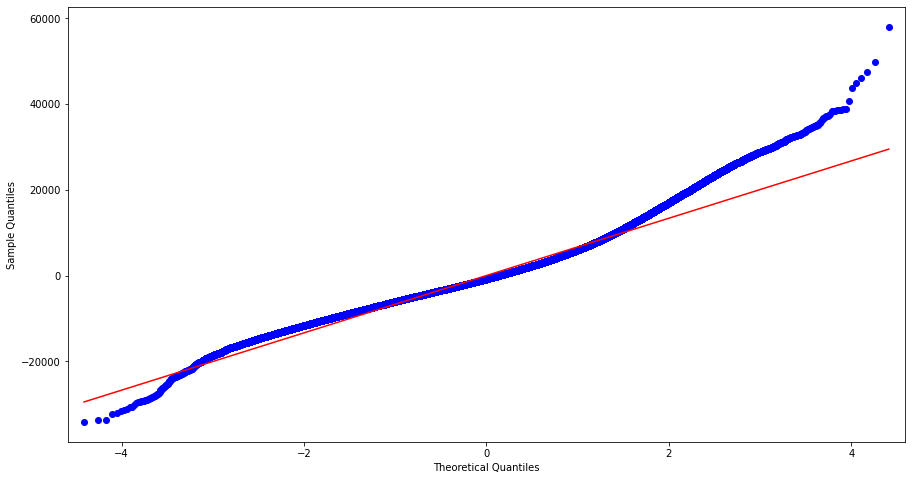

In [ ]:
plt.rcParams['figure.figsize']=[15,8]
qqplot(mlrmodel3.resid,line='r')
plt.show()

In [ ]:
# jarque Bera test

# Ho= Residuals are normally distributed
# Ha= Residuals are not normally distributed

# from summary report we can see jarque bera p value < 0.05 reject null , we can say residuals are not normally distributed
# our assumption is failing


### Backward Feature Selection

In [ ]:
y=dffinal['price']
x=dffinal.drop('price',axis=1)
x=sm.add_constant(x)
X_train,X_test,Y_train,Y_test=train_test_split(x,y,random_state=10,test_size=0.3)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(195741, 130)
(83889, 130)
(195741,)
(83889,)


In [ ]:
x_train_bf= X_train.iloc[:,1:]

cols = list(x_train_bf.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X = x_train_bf[cols]
    Xc = sm.add_constant(X)
    model = sm.OLS(Y_train,Xc).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features = cols
print(selected_features)

X_new=X[selected_features]

['engine_displacement', 'front_legroom', 'fuel_tank_volume', 'height', 'horsepower', 'length', 'maximum_seating', 'wheelbase', 'width', 'Rated_torque', 'Rated_hp', 'city_fuel_economy', 'highway_fuel_economy', 'back_legroom', 'seller_rating', 'Mid and Luxury Equipment Group', 'Entertainment packages', 'control package', 'Wheels Package', 'Headlamp Package', 'others', 'Suspension Package', 'Seating package', 'sensor package', 'high end package', 'mileage', 'savings_amount', 'year', 'body_type_Coupe', 'body_type_Hatchback', 'body_type_Minivan', 'body_type_Pickup Truck', 'body_type_SUV / Crossover', 'body_type_Sedan', 'body_type_Van', 'body_type_Wagon', 'engine_type_H6', 'engine_type_I2', 'engine_type_I3', 'engine_type_I3 Hybrid', 'engine_type_I4 Compressed Natural Gas', 'engine_type_I4 Diesel', 'engine_type_I4 Flex Fuel Vehicle', 'engine_type_I5', 'engine_type_I5 Biodiesel', 'engine_type_I5 Diesel', 'engine_type_I6', 'engine_type_I6 Diesel', 'engine_type_V10', 'engine_type_V12', 'engine_t

In [ ]:
X_new=sm.add_constant(X_new)
y=dffinal['price']
X_train,X_test,Y_train,Y_test=train_test_split(x,y,random_state=10,test_size=0.3)
mlrmodel4=sm.OLS(Y_train,X_train).fit()
print(mlrmodel4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     6704.
Date:                Tue, 12 Jul 2022   Prob (F-statistic):               0.00
Time:                        11:36:10   Log-Likelihood:            -1.9766e+06
No. Observations:              195741   AIC:                         3.953e+06
Df Residuals:                  195618   BIC:                         3.955e+06
Df Model:                         122                                         
Covariance Type:            nonrobust                                         
                                                              coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------

In [ ]:
update_score_card(algorithm_name='Linear Regression with Backward Feature Selection', model=mlrmodel4)

### Lasso Regression

In [ ]:
y=dffinal['price']
x=dffinal.drop('price',axis=1)

X_train,X_test,Y_train,Y_test=train_test_split(x,y,random_state=10,test_size=0.3)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(195741, 129)
(83889, 129)
(195741,)
(83889,)


In [ ]:
from sklearn.metrics import r2_score
lasso = Lasso()
lasso_model = lasso.fit(X_train , Y_train)

In [ ]:
update_score_card(algorithm_name='Lasso regression', model=lasso_model)

In [ ]:
tuned_paramaters = [{'alpha':[1e-15,1e-14,1e-13,1e-12,1e-11,1e-10,1e-9,1e-8,1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1,2,3,4,5,10,20]}]
lasso_grid = GridSearchCV(estimator = lasso, 
                          param_grid = tuned_paramaters, 
                          cv = 3)
lasso_grid_model =lasso_grid.fit(X_train, Y_train)


In [ ]:
lasso_grid_model.best_params_

{'alpha': 0.01}

In [ ]:
lst = Lasso(**lasso_grid_model.best_params_)
lasso_tune = lst.fit(X_train,Y_train)


In [ ]:
update_score_card(algorithm_name='Lasso regression Tuned', model=lasso_tune)

### Ridge Regression

In [ ]:
y=dffinal['price']
x=dffinal.drop('price',axis=1)

X_train,X_test,Y_train,Y_test=train_test_split(x,y,random_state=10,test_size=0.3)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(195741, 129)
(83889, 129)
(195741,)
(83889,)


In [ ]:
ridge = Ridge(alpha=1)
ridge_model = ridge.fit(X_train , Y_train)

In [ ]:
update_score_card(algorithm_name='Ridge regression', model=ridge_model)

In [ ]:
tuned_paramaters = [{'alpha':[1e-15,1e-14,1e-13,1e-12,1e-11,1e-10,1e-9,1e-8,1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1,2,3,4,5,10,20]}]
ridge_grid = GridSearchCV(estimator = ridge, 
                          param_grid = tuned_paramaters, 
                          cv = 3)
ridge_grid_model =ridge_grid.fit(X_train, Y_train)

In [ ]:
ridge_grid_model.best_params_

{'alpha': 1e-13}

In [ ]:
rst = Ridge(**ridge_grid_model.best_params_)
ridge_tune = rst.fit(X_train,Y_train)


In [ ]:
update_score_card(algorithm_name='Ridge regression Tuned', model=ridge_tune)

### Linear Models Score card

In [ ]:
score_card

Model_Name  R-Squared  \
0    Base Model-Linear Regression with All Variables   0.806997   
1  Linear Regression After Removing Multicollinea...   0.740859   
2  Linear Regression with Backward Feature Selection   0.806997   
3                                   Lasso regression   0.806268   
4                             Lasso regression Tuned   0.806995   
5                                   Ridge regression   0.806986   
6                             Ridge regression Tuned   0.806997   
7                                   Ridge regression   0.806986   
8                             Ridge regression Tuned   0.806997   

   Adj. R-Squared  Train_RMSE  Test_RMSE  
0        0.806877   5877.4892  5863.9995  
1        0.740741   6810.4795  6804.0691  
2        0.806877   5877.4892  5863.9995  
3        0.806140   5888.5843  5877.1789  
4        0.806868   5877.5130  5864.1020  
5        0.806859   5877.6605  5864.7515  
6        0.806870   5877.4892  5863.9739  
7        0.806859   5877.6605  5864.7515  
8        0.806870   5877.4892  5863.9739

# Non Linear Models

### User Defined Functions for Updating Score card

In [ ]:
# create a generalized function to calculate the RMSE values for train set
def get_train_rmse(model):
    
    # For training set:
    # train_pred: prediction made by the model on the training dataset 'X_train'
    # y_train: actual values ofthe target variable for the train dataset

    # predict the output of the target variable from the train data 
    train_pred = model.predict(X_train)

    # calculate the MSE using the "mean_squared_error" function

    # MSE for the train data
    mse_train = mean_squared_error(Y_train, train_pred)

    # take the square root of the MSE to calculate the RMSE
    # round the value upto 4 digits using 'round()'
    rmse_train = round(np.sqrt(mse_train), 4)
    
    # return the training RMSE
    return(rmse_train)

In [ ]:
# create a generalized function to calculate the RMSE values test set
def get_test_rmse(model):
    
    # For testing set:
    # test_pred: prediction made by the model on the test dataset 'X_test'
    # y_test: actual values of the target variable for the test dataset

    # predict the output of the target variable from the test data
    test_pred = model.predict(X_test)

    # MSE for the test data
    mse_test = mean_squared_error(Y_test, test_pred)

    # take the square root of the MSE to calculate the RMSE
    # round the value upto 4 digits using 'round()'
    rmse_test = round(np.sqrt(mse_test), 4)

    # return the test RMSE
    return(rmse_test)

In [ ]:
# define a function to get R-squared and adjusted R-squared value
def get_score(model):
    
    # score() returns the R-squared value
    r_sq = model.score(X_train, Y_train)
    
    # calculate adjusted R-squared value
    # 'n' denotes number of observations in train set
    # 'shape[0]' returns number of rows 
    n = X_train.shape[0]
    
    # 'k' denotes number of variables in train set
    # 'shape[1]' returns number of columns
    k = X_train.shape[1]
    
    # calculate adjusted R-squared using the formula
    r_sq_adj = 1 - ((1-r_sq)*(n-1)/(n-k-1))
    
    # return the R-squared and adjusted R-squared value 
    return ([r_sq, r_sq_adj])

In [ ]:
# create an empty dataframe to store the scores for various algorithms
score_card1 = pd.DataFrame(columns=['Model_Name', 'R-Squared',
                                       'Adj. R-Squared','Train_RMSE', 'Test_RMSE'])

# create a function to update the score card for comparision of the scores from different algorithms
# pass the model name, model build, alpha and l1_ration as input parameters
# if 'alpha' and/or 'l1_ratio' is not specified, the function assigns '-'
def update_score_card1(algorithm_name, model):
    
    # assign 'score_card' as global variable
    global score_card1

    # append the results to the dataframe 'score_card'
    # 'ignore_index = True' do not consider the index labels
    score_card1 = score_card1.append({'Model_Name': algorithm_name,
                       'Train_RMSE': get_train_rmse(model), 
                       'Test_RMSE': get_test_rmse(model), 
                       'R-Squared': get_score(model)[0], 
                       'Adj. R-Squared': get_score(model)[1]}, ignore_index = True)

### Train test split for non linear models

In [ ]:
y=dffinal['price']
x=dffinal.drop('price',axis=1)

X_train,X_test,Y_train,Y_test=train_test_split(x,y,random_state=10,test_size=0.3)

### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor


In [ ]:
dt=DecisionTreeRegressor(random_state=10)
dt.fit(X_train,Y_train)

DecisionTreeRegressor(random_state=10)

In [ ]:
update_score_card1(algorithm_name='Decision Tree with all variables', model=dt)

In [ ]:
score_card1

Model_Name  R-Squared  Adj. R-Squared  Train_RMSE  \
0  Decision Tree with all variables   0.999985        0.999985     51.8964   

   Test_RMSE  
0  3943.6301

In [ ]:
dt1=DecisionTreeRegressor(random_state=10)

params = {'max_depth': sp_randint(2,10),
      'min_samples_leaf': sp_randint(10,50),
      'min_samples_split':sp_randint(10,20)
     }

rsearch1 = RandomizedSearchCV(estimator = dt1, param_distributions = params, cv = 3, scoring ='neg_root_mean_squared_error')

rsearch1.fit(X_train, Y_train)

RandomizedSearchCV(cv=3, estimator=DecisionTreeRegressor(random_state=10),
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f1300e46090>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f1300702710>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f1307d57590>},
                   scoring='neg_root_mean_squared_error')

In [ ]:
rsearch1.best_params_

{'max_depth': 8, 'min_samples_leaf': 38, 'min_samples_split': 18}

In [ ]:
dt1 = DecisionTreeRegressor(**rsearch1.best_params_)
dt1.fit(X_train, Y_train)

DecisionTreeRegressor(max_depth=8, min_samples_leaf=38, min_samples_split=18)

In [ ]:
update_score_card1(algorithm_name='Decision Tree Tuned', model=dt1)

In [ ]:
score_card1

Model_Name  R-Squared  Adj. R-Squared  Train_RMSE  \
0  Decision Tree with all variables   0.999985        0.999985     51.8964   
1               Decision Tree Tuned   0.856662        0.856567   5065.1345   

   Test_RMSE  
0  3943.6301  
1  5089.9070

### Random forest -Final Model

In [ ]:
#RandomForest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf=RandomForestRegressor(random_state=10)
rf.fit(X_train,Y_train)

KeyboardInterrupt: ignored

In [ ]:
update_score_card1(algorithm_name='Random Forest with all variables', model=rf)

In [ ]:
score_card1.head()

Model_Name  R-Squared  Adj. R-Squared  Train_RMSE  \
0  Random Forest with all variables   0.993761        0.993757   1056.7687   

   Test_RMSE  
0  2769.3675

In [ ]:
rfq1=RandomForestRegressor(random_state=10)

params = {'max_depth': sp_randint(2,10),
      'min_samples_leaf': sp_randint(10,50),
      'min_samples_split':sp_randint(10,20)
     }

rsearch1 = RandomizedSearchCV(estimator = rf1, param_distributions = params, cv = 3, scoring ='neg_root_mean_squared_error')

rsearch1.fit(X_train, Y_train)

In [ ]:
RF=RandomForestRegressor(criterion='mse',n_estimators=480,
 min_samples_split= 14,
 min_samples_leaf=36,
 max_depth=9,random_state=10)

In [ ]:
models=[]
models.append(('Random Forest = ',RF))

In [ ]:
from sklearn import model_selection

In [ ]:
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(shuffle=True,n_splits=6,random_state=0)
	cv_results = model_selection.cross_val_score(model, x, y, cv=kfold, scoring='neg_mean_squared_error')
	results.append(np.sqrt(np.abs(cv_results)))
	names.append(name)
	print("%s: %f (%f)" % (name, np.mean(np.sqrt(np.abs(cv_results))),np.std(np.sqrt(np.abs(cv_results)),ddof=1)))


Random Forest = : 4440.074678 (66.288376)


In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 5.3 MB/s 


In [ ]:
import shap

In [ ]:
explainer = shap.TreeExplainer(rf)

shap_values = explainer.shap_values(X_train)
features=X_train.columns
shap.summary_plot(shap_values, X_train, feature_names=features, plot_type="bar")
shap.summary_plot(shap_values, X_train, feature_names=features)

### Gradient Boosting

In [ ]:
#Boosting
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
gb=GradientBoostingRegressor(random_state=10)
gb.fit(X_train,Y_train)

GradientBoostingRegressor(random_state=10)

In [ ]:
update_score_card1(algorithm_name='Gradient Boosting with all variables', model=gb)

In [ ]:
score_card1

Model_Name  R-Squared  Adj. R-Squared  \
0      Random Forest with all variables   0.993761        0.993757   
1  Gradient Boosting with all variables   0.882857        0.882780   

   Train_RMSE  Test_RMSE  
0   1056.7687  2769.3675  
1   4578.9748  4558.2562

In [ ]:
gb1 = GradientBoostingRegressor(random_state=10)
params = {'n_estimators':range(10,200,10),
          'max_depth':range(2,15),
          'learning_rate':[0.0001,0.001,0.01,0.1,0.1,0.2,0.3],
          'min_samples_split':range(10,40), 
          'min_samples_leaf':range(10,20)
         }
rsearch2 = RandomizedSearchCV(estimator = gb1, param_distributions = params, cv = 3, scoring = 'neg_root_mean_squared_error')
rsearch2.fit(X_train,Y_train) 

RandomizedSearchCV(cv=3, estimator=GradientBoostingRegressor(random_state=10),
                   param_distributions={'learning_rate': [0.0001, 0.001, 0.01,
                                                          0.1, 0.1, 0.2, 0.3],
                                        'max_depth': range(2, 15),
                                        'min_samples_leaf': range(10, 20),
                                        'min_samples_split': range(10, 40),
                                        'n_estimators': range(10, 200, 10)},
                   scoring='neg_root_mean_squared_error')

In [ ]:
rsearch2.best_params_

{'learning_rate': 0.1,
 'max_depth': 13,
 'min_samples_leaf': 19,
 'min_samples_split': 25,
 'n_estimators': 80}

In [ ]:
gb2 =GradientBoostingRegressor(**rsearch2.best_params_)
gb2.fit(X_train, Y_train)

GradientBoostingRegressor(max_depth=13, min_samples_leaf=19,
                          min_samples_split=25, n_estimators=80)

In [ ]:
update_score_card1(algorithm_name='gradient boosting Tuned', model=gb2)

In [ ]:
score_card1

Model_Name  R-Squared  Adj. R-Squared  Train_RMSE  Test_RMSE
0  gradient boosting Tuned   0.981468        0.981455   1821.2700   2654.367
1  gradient boosting Tuned   0.975443        0.975427   2096.5239   2718.037

### XGBoost

In [ ]:
#Xgboost
from xgboost import XGBRegressor

In [ ]:
xgb=XGBRegressor(random_state=10)
xgb.fit(X_train,Y_train)

[12:59:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(random_state=10)

In [ ]:
update_score_card1(algorithm_name='XGBoost with all variables', model=xgb)

In [ ]:
score_card1

Model_Name  R-Squared  Adj. R-Squared  \
0      Random Forest with all variables   0.993761        0.993757   
1  Gradient Boosting with all variables   0.882857        0.882780   
2            XGBoost with all variables   0.882638        0.882561   

   Train_RMSE  Test_RMSE  
0   1056.7687  2769.3675  
1   4578.9748  4558.2562  
2   4583.2412  4564.1900

In [ ]:
xgb1 = XGBRegressor(random_state=10)
params = {'n_estimators':range(10,200,10),
          'max_depth':range(2,15),
          'learning_rate':[0.0001,0.001,0.01,0.1,0.1,0.2,0.3],
          'min_samples_split':range(10,40), 
          'min_samples_leaf':range(10,20)
         }
rsearch4 = RandomizedSearchCV(estimator = xgb1, param_distributions = params, cv = 3, scoring = 'neg_root_mean_squared_error')
rsearch4.fit(X_train,Y_train) 

[19:28:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:32:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:37:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:41:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:46:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:51:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:56:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:59:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

RandomizedSearchCV(cv=3, estimator=XGBRegressor(random_state=10),
                   param_distributions={'learning_rate': [0.0001, 0.001, 0.01,
                                                          0.1, 0.1, 0.2, 0.3],
                                        'max_depth': range(2, 15),
                                        'min_samples_leaf': range(10, 20),
                                        'min_samples_split': range(10, 40),
                                        'n_estimators': range(10, 200, 10)},
                   scoring='neg_root_mean_squared_error')

In [ ]:
rsearch4.best_params_

{'learning_rate': 0.2,
 'max_depth': 12,
 'min_samples_leaf': 12,
 'min_samples_split': 12,
 'n_estimators': 180}

In [ ]:
xgb2 =XGBRegressor(**rsearch4.best_params_)
xgb2.fit(X_train, Y_train)

[20:42:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(learning_rate=0.2, max_depth=12, min_samples_leaf=12,
             min_samples_split=12, n_estimators=180)

In [ ]:
update_score_card1(algorithm_name='XGBoost tuned', model=xgb2)

In [ ]:
score_card1

Model_Name  R-Squared  Adj. R-Squared  Train_RMSE  Test_RMSE
0  gradient boosting Tuned   0.981468        0.981455   1821.2700  2654.3670
1  gradient boosting Tuned   0.975443        0.975427   2096.5239  2718.0370
2            XGBoost tuned   0.991502        0.991497   1233.2640  2659.8693

### Light GbM

In [ ]:
pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from lightgbm import LGBMRegressor

In [ ]:
lgbm=LGBMRegressor(random_state=10)
lgbm.fit(X_train,Y_train)

LGBMRegressor(random_state=10)

In [ ]:
update_score_card1(algorithm_name='Light Gradient Boosting with all variables', model=lgbm)

In [ ]:
score_card1

Model_Name  R-Squared  Adj. R-Squared  \
0            Decision Tree with all variables   0.999985        0.999985   
1                         Decision Tree Tuned   0.856662        0.856567   
2  Light Gradient Boosting with all variables   0.936938        0.936896   

   Train_RMSE  Test_RMSE  
0     51.8964  3943.6301  
1   5065.1345  5089.9070  
2   3359.6560  3394.9341

In [ ]:
lgb1 = LGBMRegressor(random_state=10)
params = {'num_iterations':range(100,500,10), 
          'max_depth':range(10,30,2),
          'learning_rate':[0.0001,0.001,0.01,0.1,0.1,0.2,0.3],
          'num_leaves' :range(10,50,2)
         }
rsearch3 = RandomizedSearchCV(estimator = lgb1, param_distributions = params, cv = 3, scoring = 'neg_root_mean_squared_error')
rsearch3.fit(X_train,Y_train)

RandomizedSearchCV(cv=3, estimator=LGBMRegressor(random_state=10),
                   param_distributions={'learning_rate': [0.0001, 0.001, 0.01,
                                                          0.1, 0.1, 0.2, 0.3],
                                        'max_depth': range(10, 30, 2),
                                        'num_iterations': range(100, 500, 10),
                                        'num_leaves': range(10, 50, 2)},
                   scoring='neg_root_mean_squared_error')

In [ ]:
rsearch3.best_params_

{'learning_rate': 0.1,
 'max_depth': 14,
 'num_iterations': 480,
 'num_leaves': 46}

In [ ]:
lgb2 = LGBMRegressor(**rsearch3.best_params_)
lgb2.fit(X_train, Y_train)

LGBMRegressor(max_depth=14, num_iterations=480, num_leaves=46)

In [ ]:
update_score_card1(algorithm_name='Light Gradient Boosting with Tuning', model=lgb2)

In [ ]:
score_card1

Model_Name  R-Squared  Adj. R-Squared  \
0            Decision Tree with all variables   0.999985        0.999985   
1                         Decision Tree Tuned   0.856662        0.856567   
2  Light Gradient Boosting with all variables   0.936938        0.936896   
3         Light Gradient Boosting with Tuning   0.962696        0.962671   

   Train_RMSE  Test_RMSE  
0     51.8964  3943.6301  
1   5065.1345  5089.9070  
2   3359.6560  3394.9341  
3   2583.9704  2799.7582

### Final Scorecard

In [ ]:
from PIL import Image

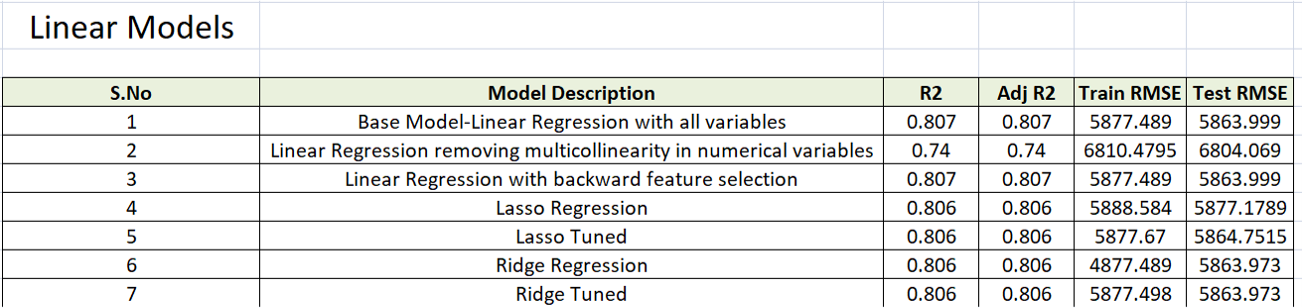

In [ ]:
Image.open('/content/drive/MyDrive/Resume/Picture2.png')

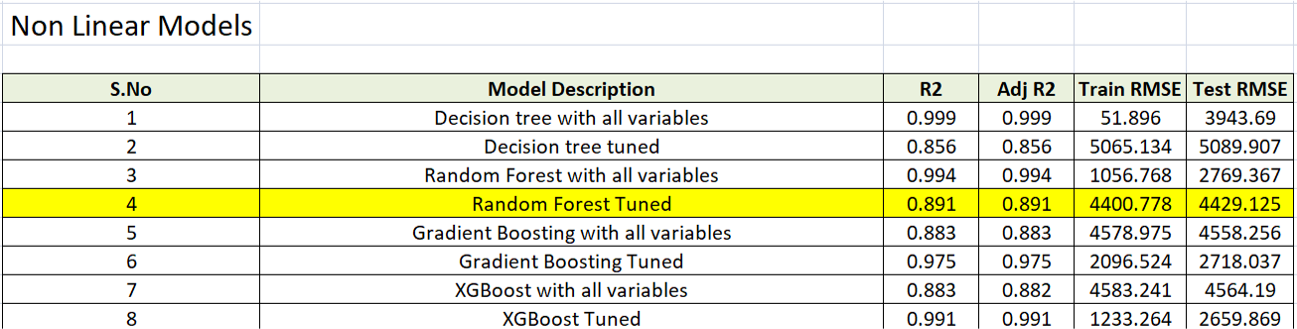

In [ ]:
Image.open('/content/drive/MyDrive/Resume/Picture1.png')

In [ ]:
## Feature Importance

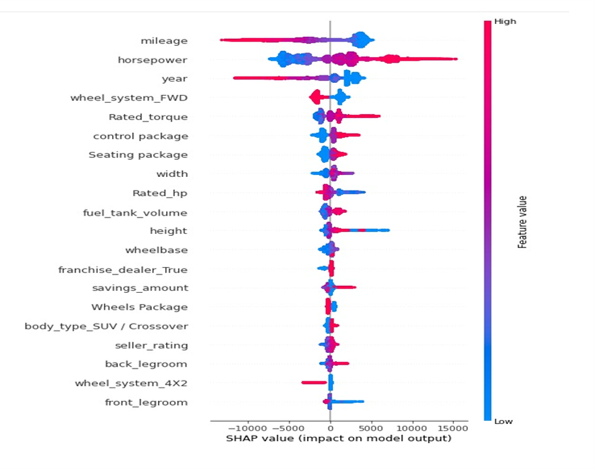

In [ ]:
Image.open('/content/drive/MyDrive/Resume/Picture3.png')

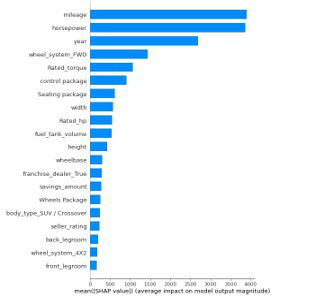

In [ ]:
Image.open('/content/drive/MyDrive/Resume/Picture4.jpg')